In [4]:
#loading and importing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
import warnings
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import io
#from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [5]:
#Load train data
#uploaded = files.upload()
file_name = 'KDDTrain+.txt'
train = pd.read_csv(file_name)

In [6]:
#Load test data
#uploaded = files.upload()
file_name1 = 'KDDTest+.txt'
test = pd.read_csv(file_name1)

In [7]:
#check first 5 lines of testing data
test.head(5)

0   tcp   private   REJ    0.1    0.2  0.3  0.4  0.5  0.6  ...  0.04.1  \
0  0   tcp   private   REJ      0      0    0    0    0    0  ...    0.00   
1  2   tcp  ftp_data    SF  12983      0    0    0    0    0  ...    0.61   
2  0  icmp     eco_i    SF     20      0    0    0    0    0  ...    1.00   
3  1   tcp    telnet  RSTO      0     15    0    0    0    0  ...    0.31   
4  0   tcp      http    SF    267  14515    0    0    0    0  ...    1.00   

   0.06.1  0.00.3  0.00.4  0.00.5  0.00.6  1.00.2  1.00.3  neptune  21  
0    0.06    0.00    0.00    0.00     0.0    1.00    1.00  neptune  21  
1    0.04    0.61    0.02    0.00     0.0    0.00    0.00   normal  21  
2    0.00    1.00    0.28    0.00     0.0    0.00    0.00    saint  15  
3    0.17    0.03    0.02    0.00     0.0    0.83    0.71    mscan  11  
4    0.00    0.01    0.03    0.01     0.0    0.00    0.00   normal  21  

[5 rows x 43 columns]

In [8]:
#check test info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        22543 non-null  int64  
 1   tcp      22543 non-null  object 
 2   private  22543 non-null  object 
 3   REJ      22543 non-null  object 
 4   0.1      22543 non-null  int64  
 5   0.2      22543 non-null  int64  
 6   0.3      22543 non-null  int64  
 7   0.4      22543 non-null  int64  
 8   0.5      22543 non-null  int64  
 9   0.6      22543 non-null  int64  
 10  0.7      22543 non-null  int64  
 11  0.8      22543 non-null  int64  
 12  0.9      22543 non-null  int64  
 13  0.10     22543 non-null  int64  
 14  0.11     22543 non-null  int64  
 15  0.12     22543 non-null  int64  
 16  0.13     22543 non-null  int64  
 17  0.14     22543 non-null  int64  
 18  0.15     22543 non-null  int64  
 19  0.16     22543 non-null  int64  
 20  0.17     22543 non-null  int64  
 21  0.18     225

In [9]:
labels = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'xAttack','outcome']
train.columns = labels
test.columns = labels

In [10]:
#provide a description for our training  data
train.describe()

duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125972.000000    125972.000000  ...       125972.000000   
mean        0.395739         0.279253  ...          115.653725   
std         0.489011        23.942137  ...          110.702886   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125972.000000           125972.000000   
mean                 0.521244                0.082952   
std                  0.448950                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate        outcome  
count             125972.000000  125972.000000  
mean                   0.120241      19.504056  
std                    0.319460       2.291512  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                   

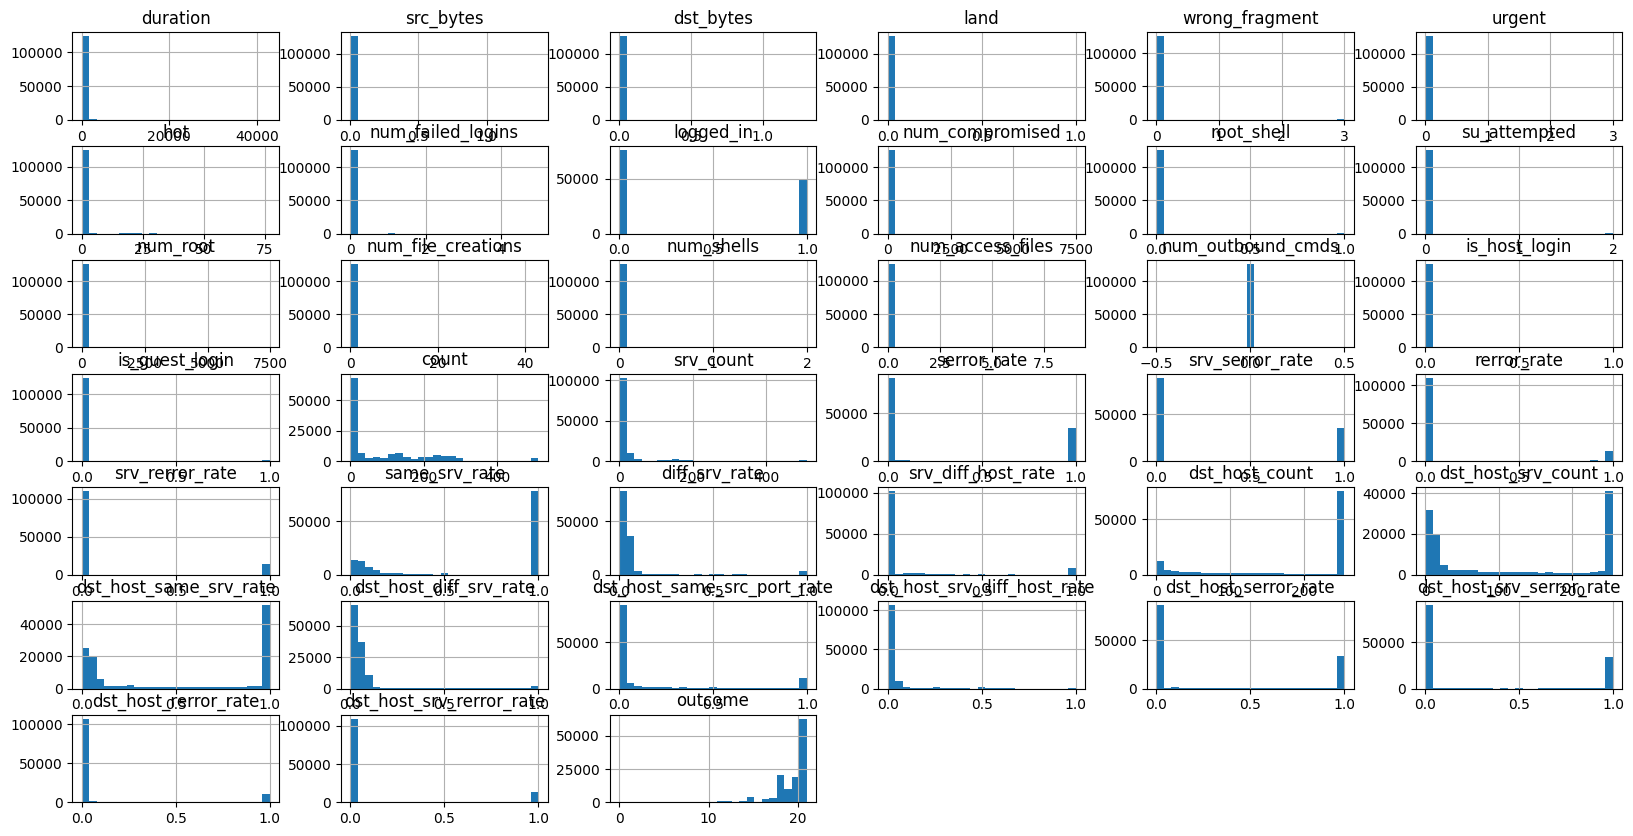

In [11]:
#displays the distribution of our dataset by a histogram.
train.hist(bins=25,figsize=(20,10));

In [12]:
train.shape

(125972, 43)

In [13]:
test.shape

(22543, 43)

#*is there a relationship between protocol type and occurance of attack?*

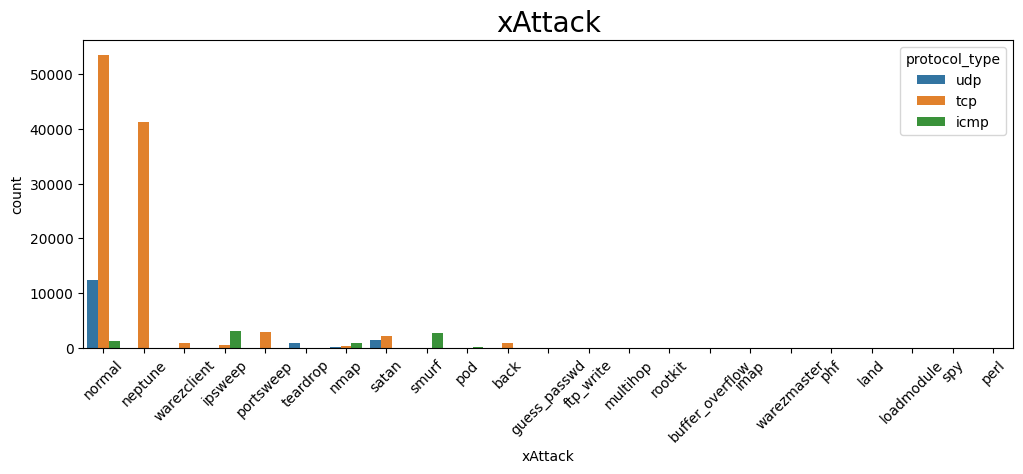

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(x='xAttack',data=train,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('xAttack',fontdict={'fontsize':20})
plt.show()

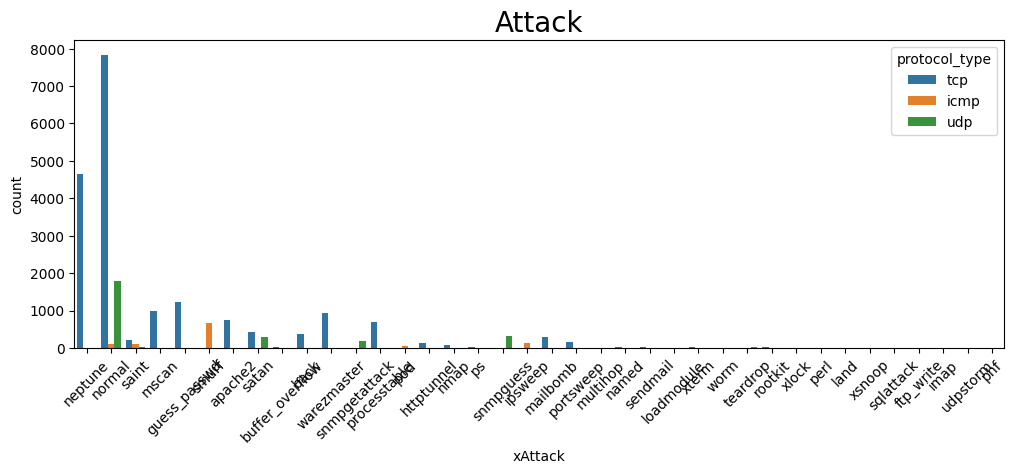

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(x='xAttack',data=test,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack',fontdict={'fontsize':20})
plt.show()

We can see that attacks occur more for tcp protocol, then udp, then icmp.

#*What is the most service used?*

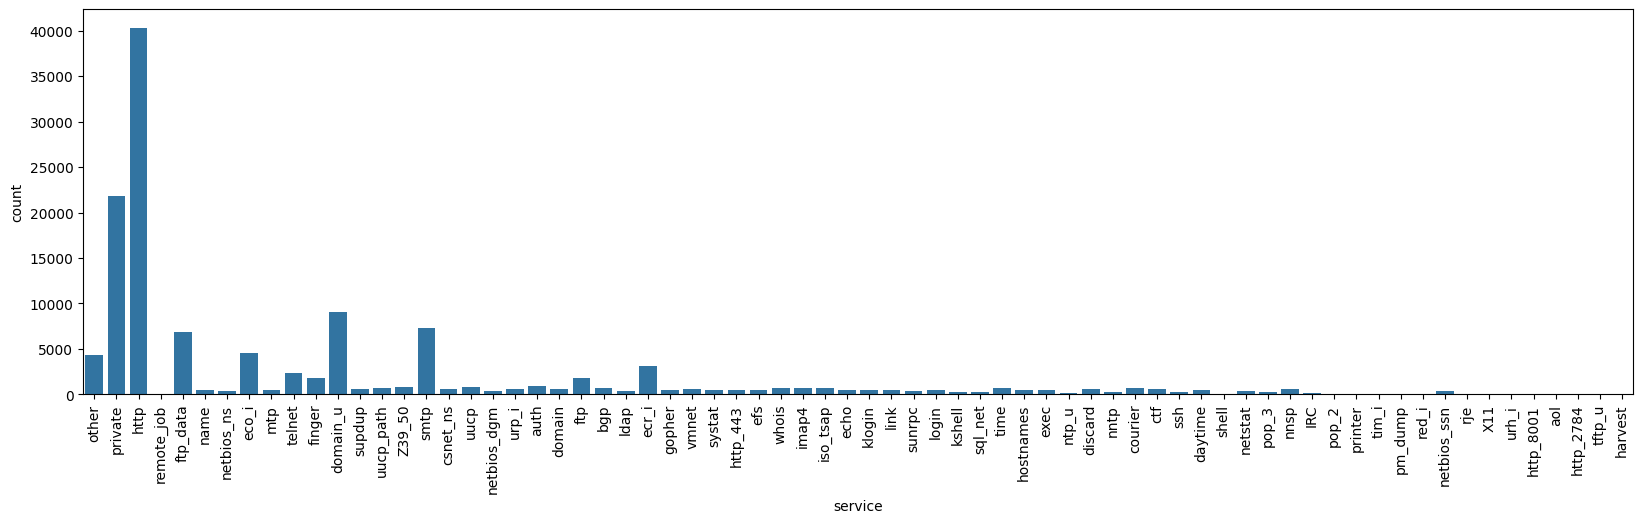

In [16]:
#services in train dataset
plt.figure(figsize=(20,5))
t = sns.countplot(x='service', data = train)
t.set_xticklabels(t.get_xticklabels(),rotation=90);

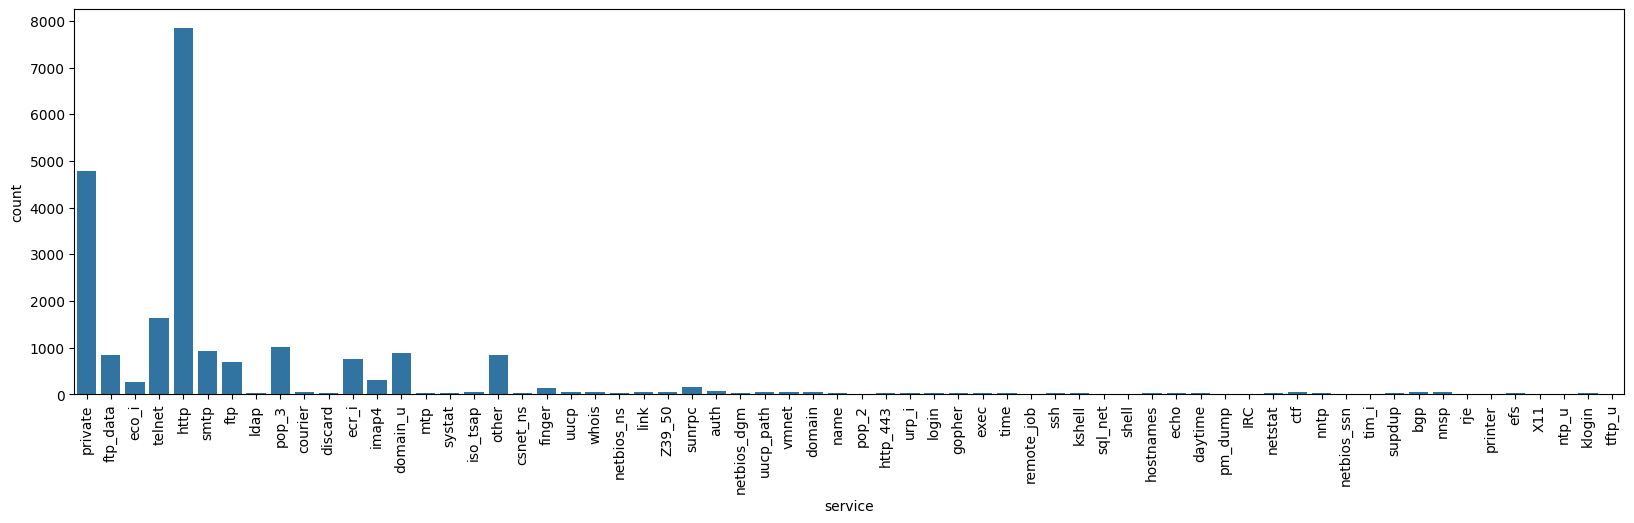

In [17]:
#services in test dataset
plt.figure(figsize=(20,5))
t = sns.countplot(x='service', data = test)
t.set_xticklabels(t.get_xticklabels(),rotation=90);

#*we check the flags*

http is the most website service used

In [18]:
train["flag"].value_counts()

flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

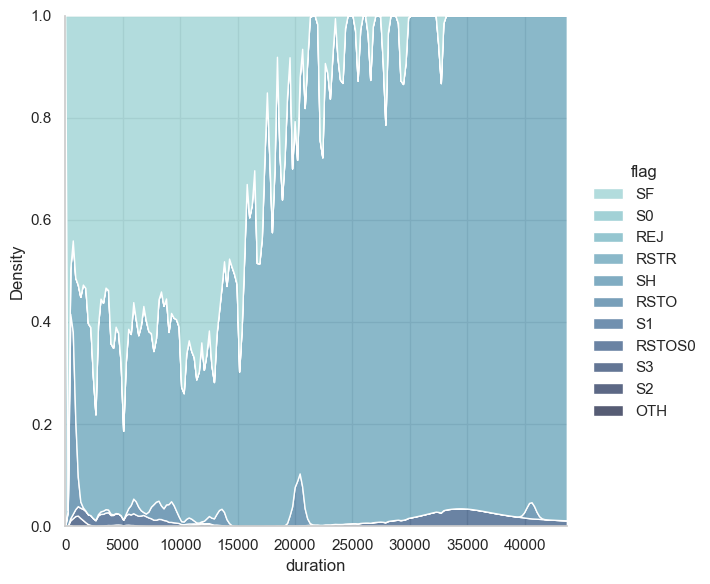

In [19]:
sns.set_theme(style="whitegrid")

sns.displot(
    data=train,
    x="duration", hue="flag",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
);

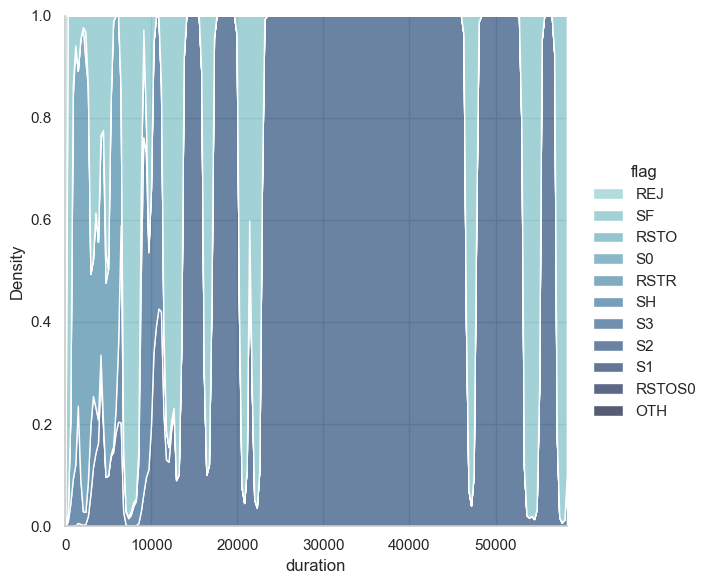

In [20]:
sns.set_theme(style="whitegrid")

sns.displot(
    data=test,
    x="duration", hue="flag",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
);

#*Check the attack rate*

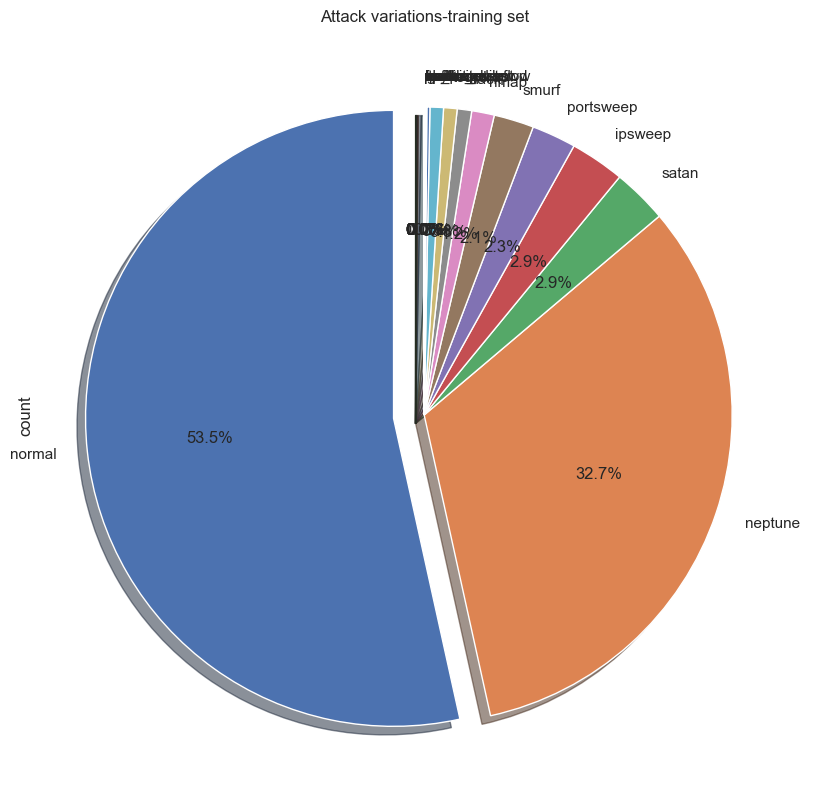

In [21]:
plt.figure(figsize=(10, 10))

# Get the value counts for the 'attack' column
attack_counts = train['xAttack'].value_counts()

# Generate explode values dynamically based on the number of unique values
explode_values = tuple(0.1 if i == 0 else 0 for i in range(len(attack_counts)))

# Plot the pie chart
r = attack_counts.plot(kind='pie', shadow=True, explode=explode_values, startangle=90, autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(), rotation=90)
plt.title('Attack variations-training set')
plt.show()


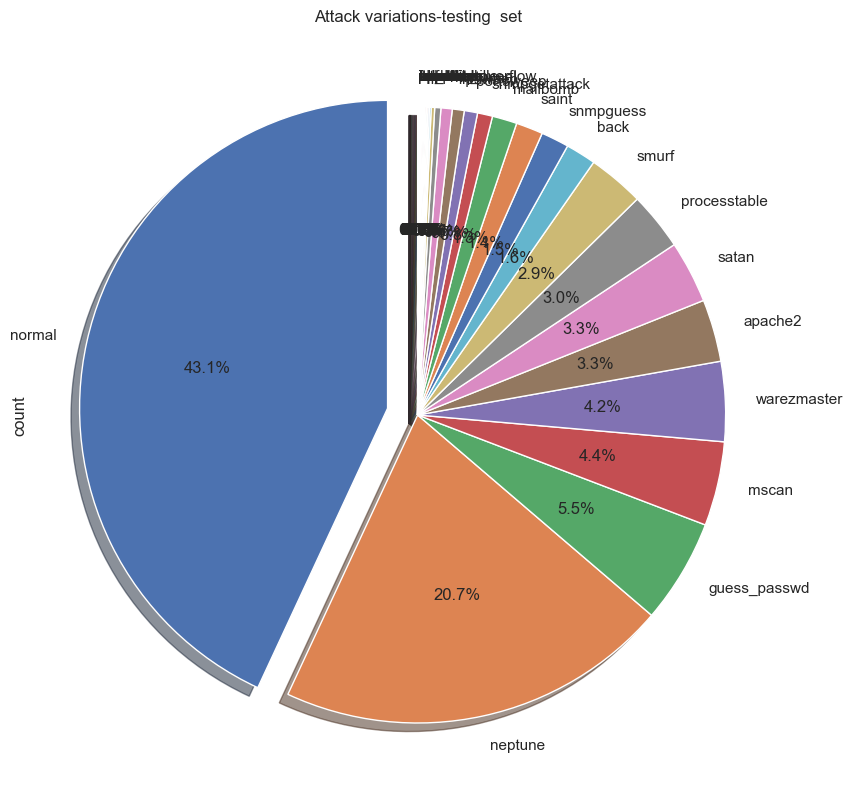

In [22]:
plt.figure(figsize=(10, 10))

# Get the value counts for the 'attack' column
attack_counts = test['xAttack'].value_counts()

# Generate explode values dynamically based on the number of unique values
explode_values = tuple(0.1 if i == 0 else 0 for i in range(len(attack_counts)))

# Plot the pie chart
r = attack_counts.plot(kind='pie', shadow=True, explode=explode_values, startangle=90, autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(), rotation=90)
plt.title('Attack variations-testing  set')
plt.show()


<Axes: xlabel='protocol_type', ylabel='count'>

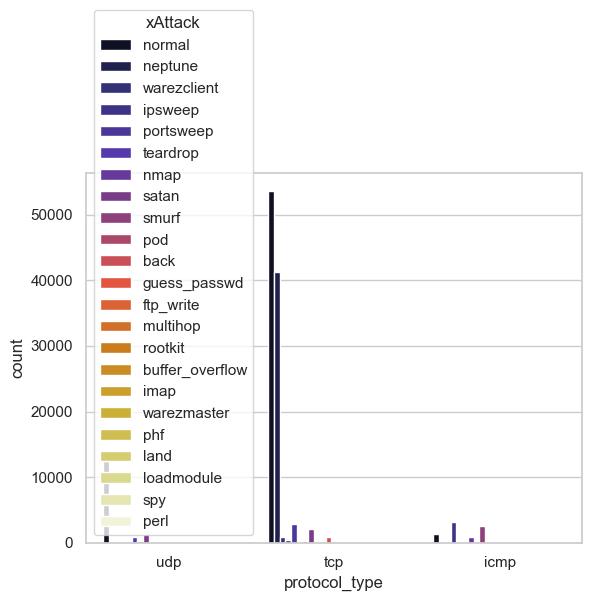

In [23]:
#check the attack depending on protocol types for the train
sns.countplot(x='protocol_type',hue='xAttack' , data = train , palette ='CMRmap')

<Axes: xlabel='protocol_type', ylabel='count'>

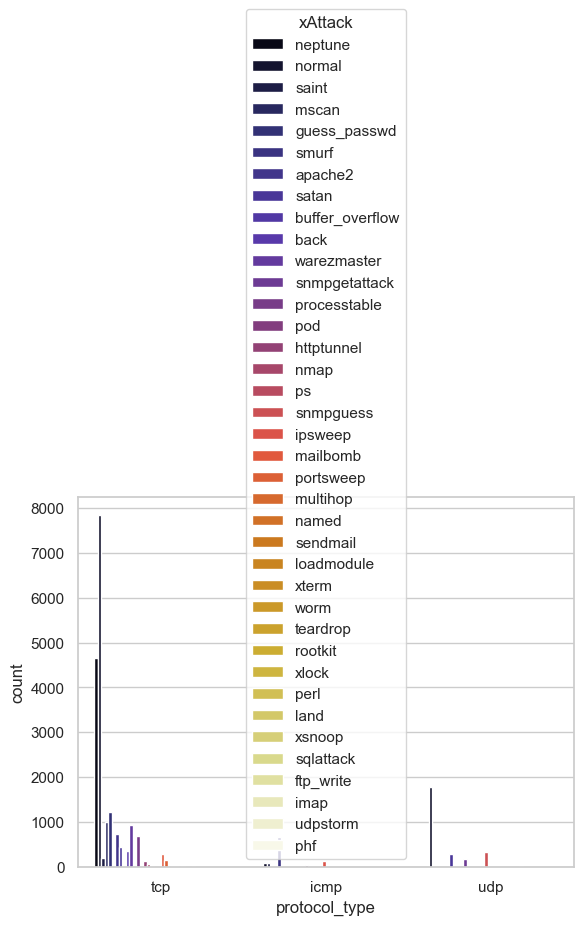

In [24]:
#check the attack depending on protocol types for the test
sns.countplot(x='protocol_type',hue='xAttack' , data = test , palette ='CMRmap')

we notice that most attack are performed via tcp protocol

<Axes: xlabel='flag', ylabel='count'>

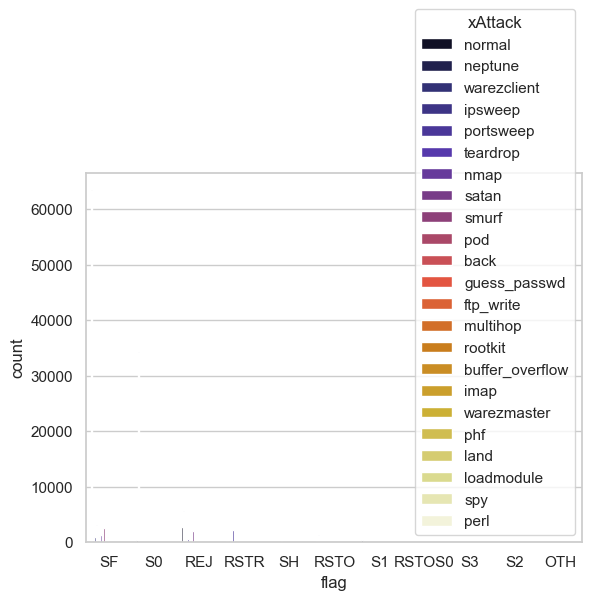

In [25]:
#check the attack depending on the flags in train
sns.countplot(x='flag',hue='xAttack' , data = train , palette ='CMRmap')

<Axes: xlabel='flag', ylabel='count'>

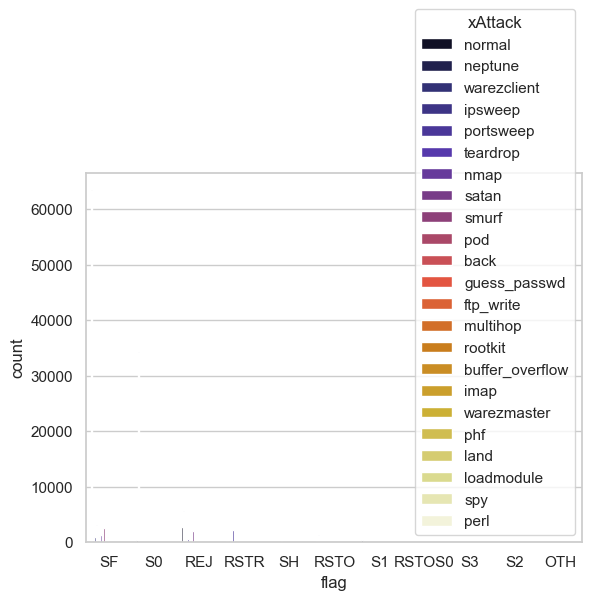

In [26]:
#check the attack depending on the flags in test
sns.countplot(x='flag',hue='xAttack' , data = train , palette ='CMRmap')

most of attacked packets used S0 flag.
we also can see almost all flags are attacked but in differents ratio.
we can see huge normal traffic is SF.

#*see protocols types*

<Axes: ylabel='count'>

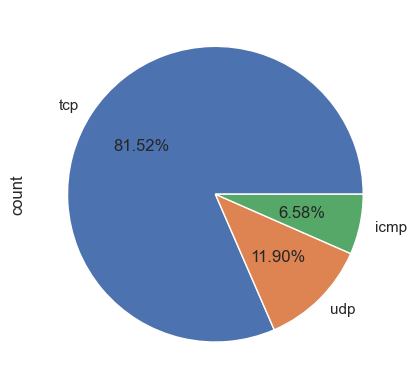

In [27]:
round(train["protocol_type"].value_counts()/train.shape[0]*100,2).plot.pie(autopct="%1.2f%%")

<Axes: ylabel='count'>

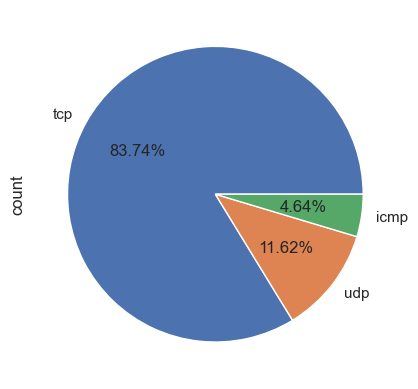

In [28]:
round(test["protocol_type"].value_counts()/train.shape[0]*100,2).plot.pie(autopct="%1.2f%%")

#*see logged in counts*

<Axes: xlabel='logged_in', ylabel='count'>

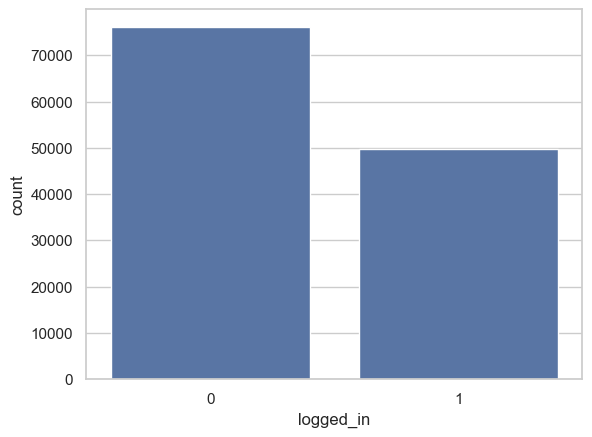

In [29]:
train["logged_in"].value_counts()
sns.countplot(x=train["logged_in"])

<Axes: xlabel='logged_in', ylabel='count'>

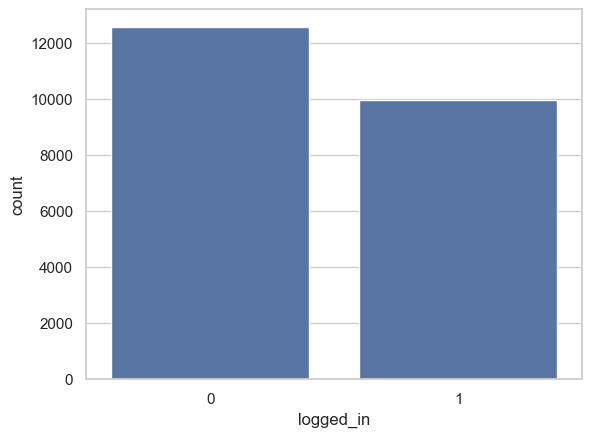

In [30]:
test["logged_in"].value_counts()
sns.countplot(x=test["logged_in"])

**DataPreparation**

In [31]:
# check missing values
train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

There are no missing data

In [32]:
# let's check unique values
columns1=train.columns
for col in columns1:
    print(col,':\n',train[col].unique())
    print(train[col].value_counts())
    print('\n',20*'**','\n')

duration :
 [    0  5607   507 ...  5430 11680   679]
duration
0        115954
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64

 **************************************** 

protocol_type :
 ['udp' 'tcp' 'icmp']
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

 **************************************** 

service :
 ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'

[Text(0, 0, 'duration'),
 Text(1, 0, 'src_bytes'),
 Text(2, 0, 'dst_bytes'),
 Text(3, 0, 'land'),
 Text(4, 0, 'wrong_fragment'),
 Text(5, 0, 'urgent'),
 Text(6, 0, 'hot'),
 Text(7, 0, 'num_failed_logins'),
 Text(8, 0, 'logged_in'),
 Text(9, 0, 'num_compromised'),
 Text(10, 0, 'root_shell'),
 Text(11, 0, 'su_attempted'),
 Text(12, 0, 'num_root'),
 Text(13, 0, 'num_file_creations'),
 Text(14, 0, 'num_shells'),
 Text(15, 0, 'num_access_files'),
 Text(16, 0, 'num_outbound_cmds'),
 Text(17, 0, 'is_host_login'),
 Text(18, 0, 'is_guest_login'),
 Text(19, 0, 'count'),
 Text(20, 0, 'srv_count'),
 Text(21, 0, 'serror_rate'),
 Text(22, 0, 'srv_serror_rate'),
 Text(23, 0, 'rerror_rate'),
 Text(24, 0, 'srv_rerror_rate'),
 Text(25, 0, 'same_srv_rate'),
 Text(26, 0, 'diff_srv_rate'),
 Text(27, 0, 'srv_diff_host_rate'),
 Text(28, 0, 'dst_host_count'),
 Text(29, 0, 'dst_host_srv_count'),
 Text(30, 0, 'dst_host_same_srv_rate'),
 Text(31, 0, 'dst_host_diff_srv_rate'),
 Text(32, 0, 'dst_host_same_src_port

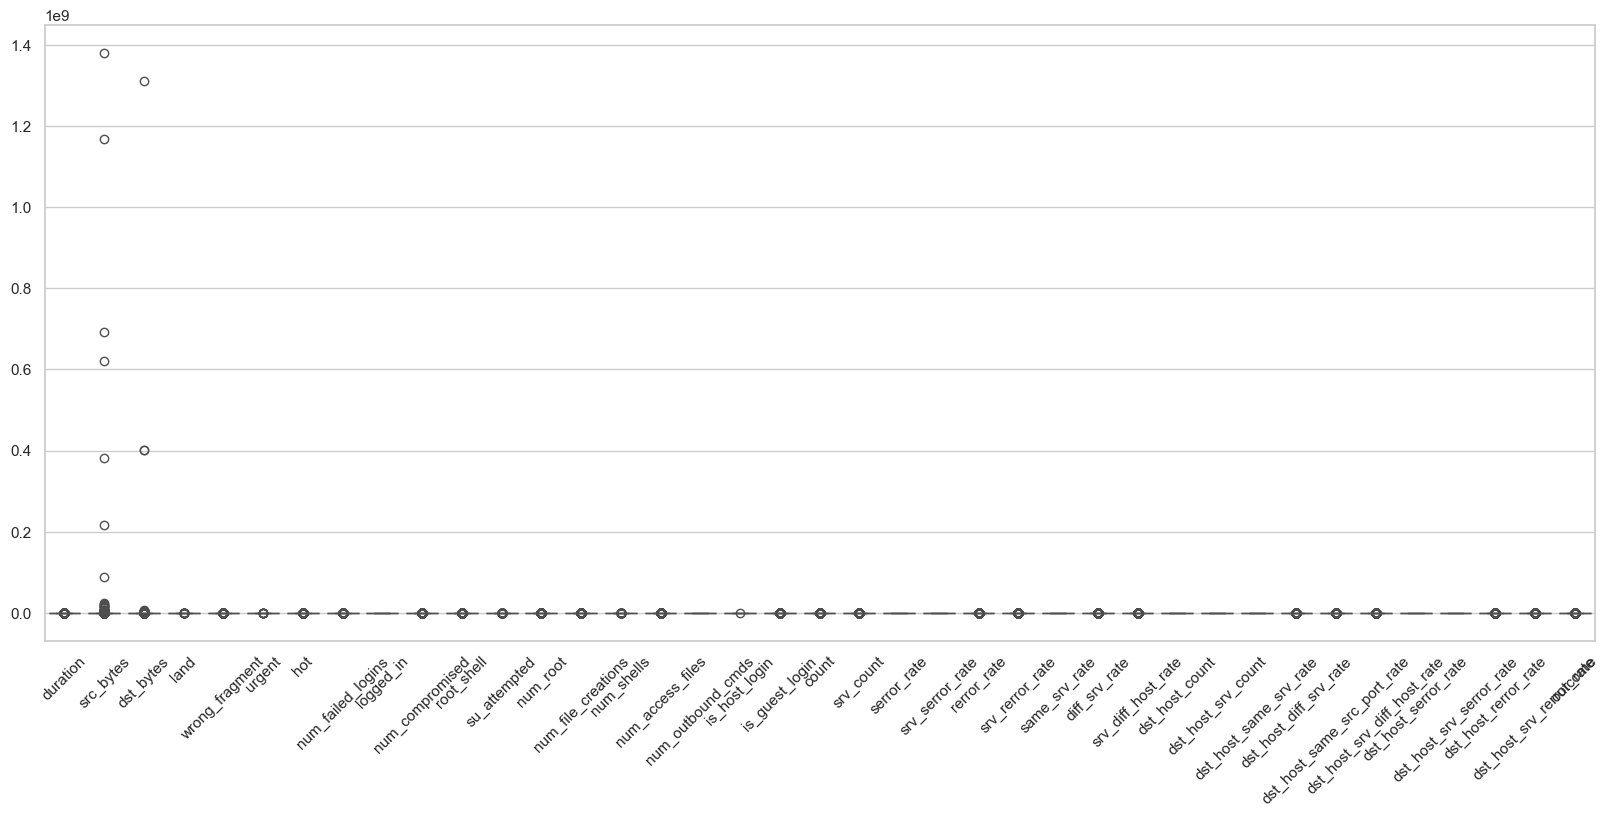

In [33]:
#check outliers
plt.figure(figsize = (20,8))
u = sns.boxplot(palette = 'cool', data=train)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

theres a lot of outliers so we need to calculate it

In [34]:
def DEF_outliers(data, col):
    OUT = pd.DataFrame(columns=["< Q1", "> Q3"], index=col)

    for col_ in col:
        if data[col_].dtype in ['int64', 'float64']:#checks if the data type of each column is either 'int64' or 'float64' before attempting to calculate quartiles and IQR.
            count_under = 0
            count_upper = 0
            outlier = data[col_]
            #It calculates the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR) for the current column.
            Q1 = outlier.quantile(0.25)
            Q3 = outlier.quantile(0.75)
            IQR = Q3 - Q1
            #defines the lower and upper bounds for identifying outliers based on the IQR.
            underoutliers = Q1 - 1.5 * IQR
            upperoutliers = Q3 + 1.5 * IQR
            #creates Boolean masks (under_border and upper_border) to identify values below Q1 and above Q3.
            under_border = (outlier < underoutliers)
            upper_border = (outlier > upperoutliers)
            #counts the number of values below Q1 and above Q3 for the current column and stores these counts in the OUT DataFrame.
            OUT.loc[col_, "< Q1"] = sum(under_border)
            OUT.loc[col_, "> Q3"] = sum(upper_border)

    return OUT


In [35]:
#numerical columns only
col_num = train.columns
col_num [4:-1]

Index(['src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [36]:
DEF_outliers(train,col_num[4:-1])

< Q1   > Q3
src_bytes                      0  13840
dst_bytes                      0  23579
land                           0     25
wrong_fragment                 0   1090
urgent                         0      9
hot                            0   2671
num_failed_logins              0    122
logged_in                      0      0
num_compromised                0   1286
root_shell                     0    169
su_attempted                   0     80
num_root                       0    649
num_file_creations             0    287
num_shells                     0     47
num_access_files               0    371
num_outbound_cmds              0      0
is_host_login                  0      1
is_guest_login                 0   1187
count                          0   3157
srv_count                      0  12054
serror_rate                    0      0
srv_serror_rate                0      0
rerror_rate                    0  16190
srv_rerror_rate                0  16206
same_srv_rate                  0      0
diff_srv_rate                  0   7788
srv_diff_host_rate             0  28399
dst_host_count                 0      0
dst_host_srv_count             0      0
dst_host_same_srv_rate         0      0
dst_host_diff_srv_rate         0  10550
dst_host_same_src_port_rate    0  25051
dst_host_srv_diff_host_rate    0  11682
dst_host_serror_rate           0      0
dst_host_srv_serror_rate       0      0
dst_host_rerror_rate           0  22794
dst_host_srv_rerror_rate       0  19357
xAttack                      NaN    NaN

we can see most of outliers are in upper_border , i will not drop any outliers.

#Data encoding

In [37]:
# Print unique categories for object-type features
print('Training set:')
[print(f"Feature '{col_name}' has {len(train[col_name].unique())} categories") for col_name in train.columns if train[col_name].dtypes == 'object']

# Print distribution of categories in 'service'
print('\nDistribution of categories in service:')
print(train['service'].value_counts().sort_values(ascending=False).head())


Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'xAttack' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6859
Name: count, dtype: int64


In [38]:
# Print unique categories for object-type features
print('Testing set:')
[print(f"Feature '{col_name}' has {len(test[col_name].unique())} categories") for col_name in test.columns if test[col_name].dtypes == 'object']

# Print distribution of categories in 'service'
print('\nDistribution of categories in service:')
print(test['service'].value_counts().sort_values(ascending=False).head())

Testing set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'xAttack' has 38 categories

Distribution of categories in service:
service
http       7853
private    4773
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


In [39]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

categorical_values = train[categorical_columns]
test_categorical_values = test[categorical_columns]

categorical_values.head()

protocol_type  service flag
0           udp    other   SF
1           tcp  private   S0
2           tcp     http   SF
3           tcp     http   SF
4           tcp  private  REJ

In [40]:
# protocol type
unique_protocol=sorted(train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

In [41]:
# One hot encoding training set
cat_data = pd.get_dummies(categorical_values, columns=['protocol_type', 'service', 'flag']).astype(int)

# One hot encoding test set
test_cat_data = pd.get_dummies(test_categorical_values, columns=['protocol_type', 'service', 'flag']).astype(int)


In [42]:
cat_data.head()

protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0                   0                  0                  1            0   
1                   0                  1                  0            0   
2                   0                  1                  0            0   
3                   0                  1                  0            0   
4                   0                  1                  0            0   

   service_X11  service_Z39_50  service_aol  service_auth  service_bgp  \
0            0               0            0             0            0   
1            0               0            0             0            0   
2            0               0            0             0            0   
3            0               0            0             0            0   
4            0               0            0             0            0   

   service_courier  ...  flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  \
0                0  ...         0          0            0          0        0   
1                0  ...         0          0            0          0        1   
2                0  ...         0          0            0          0        0   
3                0  ...         0          0            0          0        0   
4                0  ...         1          0            0          0        0   

   flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  
0        0        0        0        1        0  
1        0        0        0        0        0  
2        0        0        0        1        0  
3        0        0        0        1        0  
4        0        0        0        0        0  

[5 rows x 84 columns]

In [43]:
trainservice=train['service'].tolist()
testservice= test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_urh_i',
 'service_http_2784',
 'service_aol',
 'service_http_8001',
 'service_harvest',
 'service_red_i']

In [44]:
for col in difference:
    test_cat_data[col] = 0

print(cat_data.shape)    
print(test_cat_data.shape)

(125972, 84)
(22543, 84)


In [45]:
data_train=train.join(cat_data)
data_train.drop('flag', axis=1, inplace=True)
data_train.drop('protocol_type', axis=1, inplace=True)
data_train.drop('service', axis=1, inplace=True)

# test data
data_test=test.join(test_cat_data)
data_test.drop('flag', axis=1, inplace=True)
data_test.drop('protocol_type', axis=1, inplace=True)
data_test.drop('service', axis=1, inplace=True)

print(data_train.shape)
print(data_test.shape)

(125972, 124)
(22543, 124)


In [46]:
Attack=data_train['xAttack']
Attack_test=data_test['xAttack']


# change the xAttack column
newAttack=Attack.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newAttack_test=Attack_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



# put the new xAttack column back
data_train['xAttack'] = newAttack
data_test['xAttack'] = newAttack_test

In [47]:

#creating new DataFrames for each attack type (DoS, Probe, R2L, U2R). 
to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]

#train
DoS_df=data_train[data_train['xAttack'].isin(to_drop_DoS)];
Probe_df=data_train[data_train['xAttack'].isin(to_drop_Probe)];
R2L_df=data_train[data_train['xAttack'].isin(to_drop_R2L)];
U2R_df=data_train[data_train['xAttack'].isin(to_drop_U2R)];



#test
DoS_df_test=data_test[data_test['xAttack'].isin(to_drop_DoS)];
Probe_df_test=data_test[data_test['xAttack'].isin(to_drop_Probe)];
R2L_df_test=data_test[data_test['xAttack'].isin(to_drop_R2L)];
U2R_df_test=data_test[data_test['xAttack'].isin(to_drop_U2R)];


print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113269, 124)
Dimensions of Probe: (78998, 124)
Dimensions of R2L: (68337, 124)
Dimensions of U2R: (67394, 124)

Test:
Dimensions of DoS: (17170, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


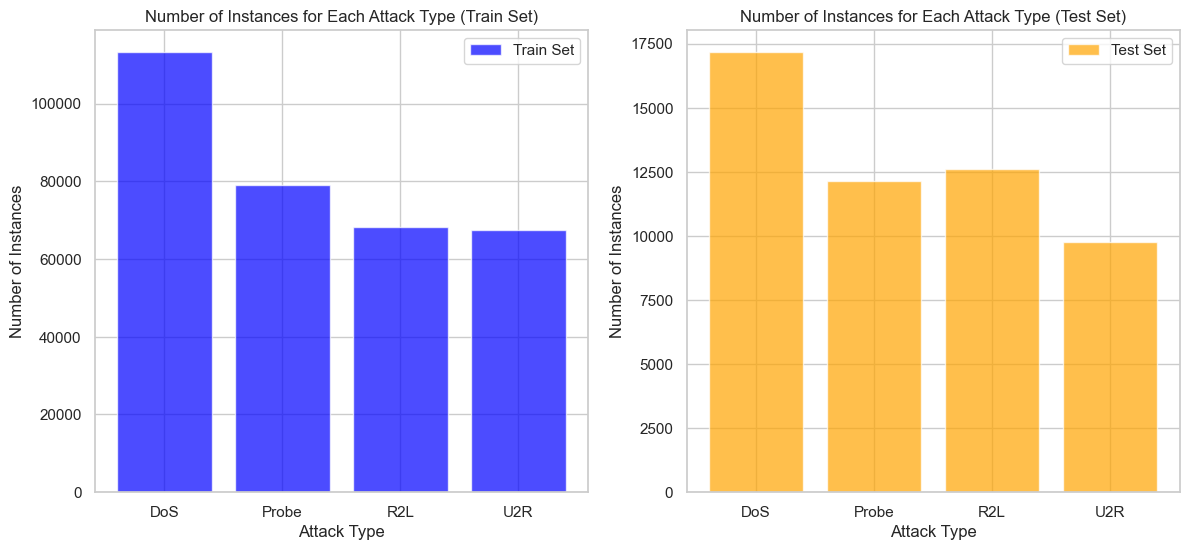

In [48]:


# Define attack types
attack_types = ['DoS', 'Probe', 'R2L', 'U2R']

# Count instances for each attack type in the training set
train_instances = [DoS_df.shape[0], Probe_df.shape[0], R2L_df.shape[0], U2R_df.shape[0]]

# Count instances for each attack type in the test set
test_instances = [DoS_df_test.shape[0], Probe_df_test.shape[0], R2L_df_test.shape[0], U2R_df_test.shape[0]]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot instances for training set
ax1.bar(attack_types, train_instances, color='blue', alpha=0.7, label='Train Set')
ax1.set_xlabel('Attack Type')
ax1.set_ylabel('Number of Instances')
ax1.set_title('Number of Instances for Each Attack Type (Train Set)')
ax1.legend()

# Plot instances for test set
ax2.bar(attack_types, test_instances, color='orange', alpha=0.7, label='Test Set')
ax2.set_xlabel('Attack Type')
ax2.set_ylabel('Number of Instances')
ax2.set_title('Number of Instances for Each Attack Type (Test Set)')
ax2.legend()

plt.show()


Feature scalling= Normalization classification

In [49]:
#split datafarame to x and y 
X_DoS = DoS_df.drop('xAttack',axis=1)
Y_DoS = DoS_df.xAttack

X_Probe = Probe_df.drop('xAttack',axis=1)
Y_Probe = Probe_df.xAttack

X_R2L = R2L_df.drop('xAttack',axis=1)
Y_R2L = R2L_df.xAttack

X_U2R = U2R_df.drop('xAttack',axis=1)
Y_U2R = U2R_df.xAttack

# test set
X_DoS_test = DoS_df_test.drop('xAttack',axis=1)
Y_DoS_test = DoS_df_test.xAttack

X_Probe_test = Probe_df_test.drop('xAttack',axis=1)
Y_Probe_test = Probe_df_test.xAttack

X_R2L_test = R2L_df_test.drop('xAttack',axis=1)
Y_R2L_test = R2L_df_test.xAttack

X_U2R_test = U2R_df_test.drop('xAttack',axis=1)
Y_U2R_test = U2R_df_test.xAttack


In [50]:
#We save the column names for later use since column names will be deleted at this stage.

In [51]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [52]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 

scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)

scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)

scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

Feature selection

In [53]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10,n_jobs=2)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)

rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [54]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [55]:
rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [56]:
rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [57]:
#summary

In [58]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'outcome', 'service_ecr_i']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'outcome', 'protocol_type_icmp', 'protocol_type_tcp', 'service_private']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'is_guest_login', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'outcome', 'service_ftp_data']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'num_compromised', 'root_shell', 'num_file_creations', 'count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src

In [59]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113269, 13)
(78998, 13)
(68337, 13)
(67394, 13)


**Model**

SVM

In [60]:
from sklearn.svm import SVC

clf_SVM_DoS=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_Probe=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_R2L=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_U2R=SVC(kernel='linear', C=1.0, random_state=0)

clf_SVM_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_SVM_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_SVM_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_SVM_U2R.fit(X_U2R, Y_U2R.astype(int))

SVC(kernel='linear', random_state=0)

In [61]:
#DOS SET

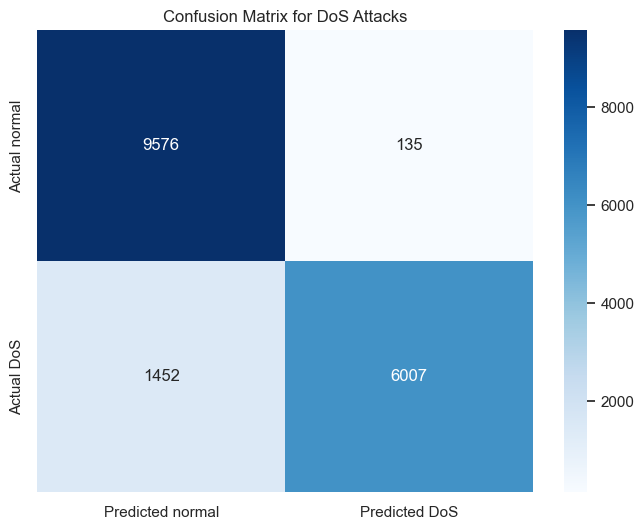

In [62]:
Y_DoS_pred=clf_SVM_DoS.predict(X_DoS_test)


conf_matrix = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual DoS'], columns=['Predicted normal', 'Predicted DoS'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DoS Attacks')
plt.show()


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99371 (+/- 0.00444)
Precision: 0.99094 (+/- 0.00857)
Recall: 0.99464 (+/- 0.00495)
F-measure: 0.99278 (+/- 0.00508)


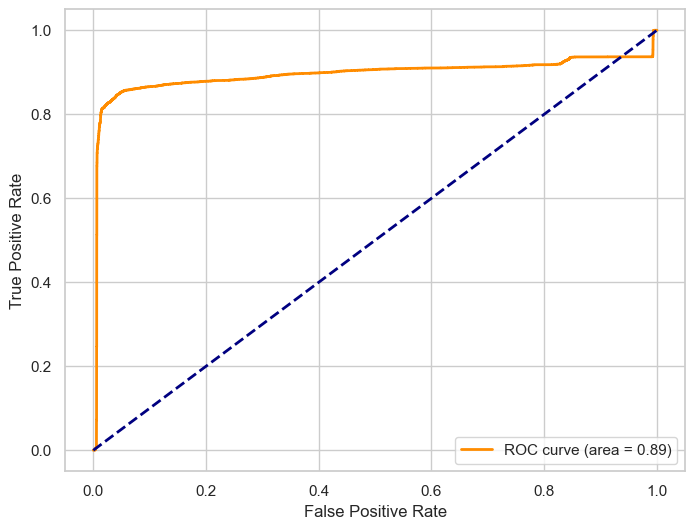

In [65]:
from sklearn.metrics import roc_curve, auc
Y_DoS_scores = clf_SVM_DoS.decision_function(X_DoS_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_DoS_test, Y_DoS_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Accuracy: High accuracy at 99.37% indicates precise overall classification.
Precision: Exceptionally high precision at 99.9% suggests very few false positives.
Recall: Good recall at 99.27% indicates capturing most true positives.
F-measure: High F-measure at 99.28% signifies a balanced precision-recall trade-off.


In [ ]:
#PROBE SET

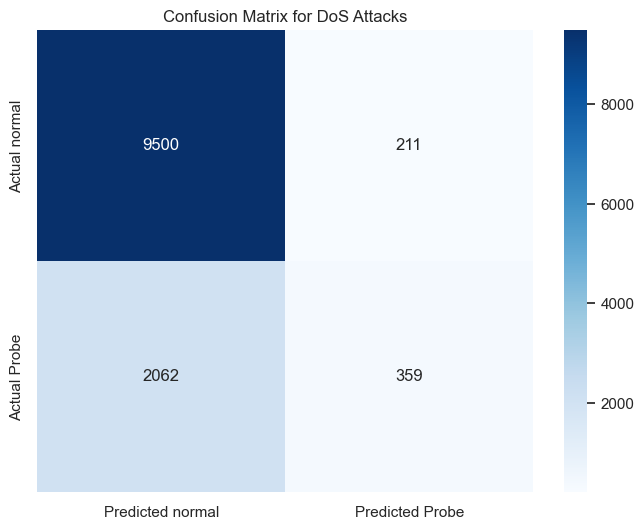

In [67]:
Y_Probe_pred=clf_SVM_Probe.predict(X_Probe_test)
# Create confusion matrix
conf_matrix = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual Probe'], columns=['Predicted normal', 'Predicted Probe'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DoS Attacks')
plt.show()


In [68]:
accuracy = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99415 (+/- 0.00393)
Precision: 0.99201 (+/- 0.00792)
Recall: 0.98968 (+/- 0.00675)
F-measure: 0.99082 (+/- 0.00614)


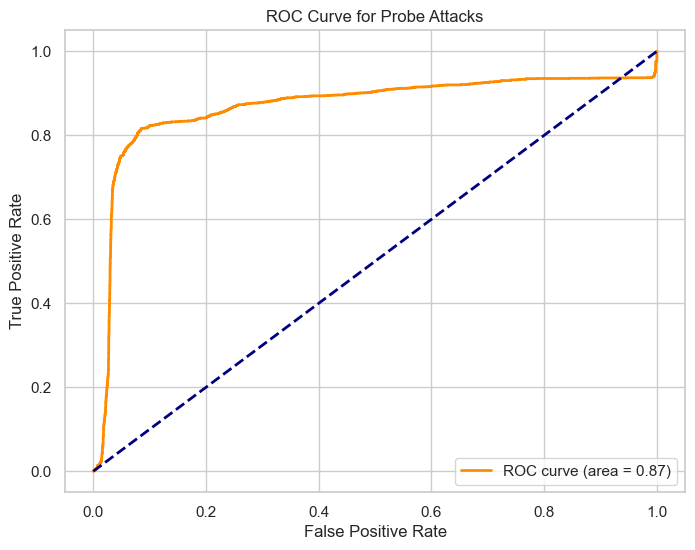

In [71]:
Y_Probe_test_binary = (Y_Probe_test == 2).astype(int)

Y_Probe_scores = clf_SVM_Probe.decision_function(X_Probe_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_Probe_test_binary, Y_Probe_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve for Probe Attacks')
plt.show()

Accuracy: High accuracy at 99.42% showcases accurate overall classification.
Precision: High precision at 99.2% indicates low false positives.
Recall: Good recall at 98.97% suggests capturing most true positives.
F-measure: Strong F-measure at 99.08% reflects a balanced precision-recall trade-off.


In [ ]:
#R2L SET

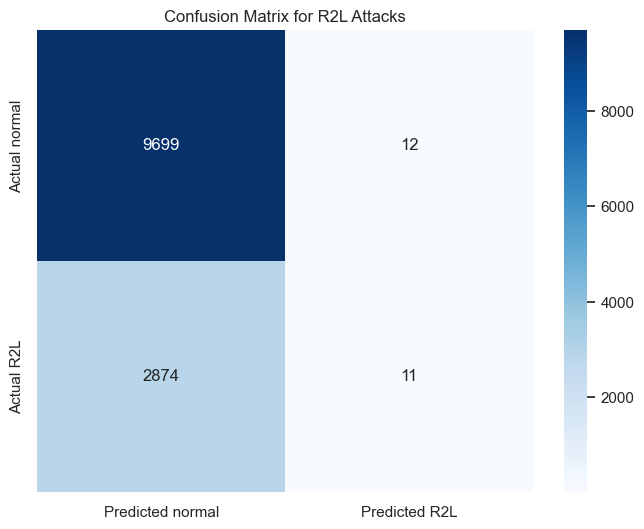

In [73]:
Y_R2L_pred=clf_SVM_R2L.predict(X_R2L_test)
# Create confusion matrix
conf_matrix = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual R2L'], columns=['Predicted normal', 'Predicted R2L'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for R2L Attacks')
plt.show()

In [74]:
accuracy = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99016 (+/- 0.00450)
Precision: 0.98194 (+/- 0.00969)
Recall: 0.99069 (+/- 0.00369)
F-measure: 0.98620 (+/- 0.00617)


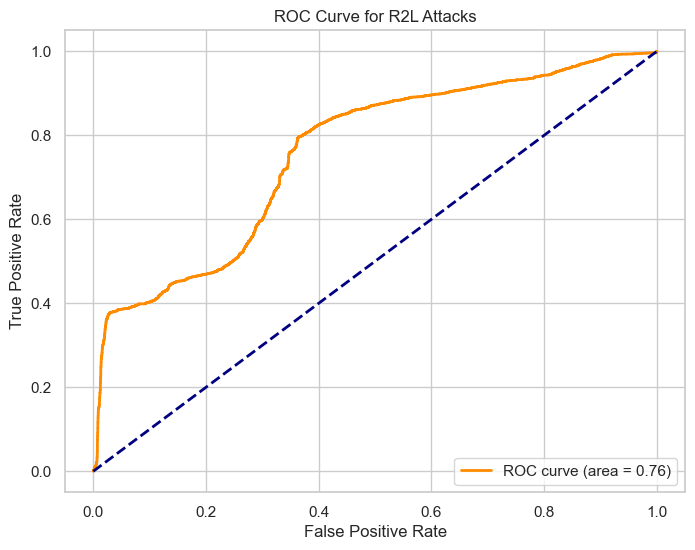

In [76]:
Y_R2L_test_binary = (Y_R2L_test == 3).astype(int)

Y_R2L_scores = clf_SVM_R2L.decision_function(X_R2L_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_R2L_test_binary, Y_R2L_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve for R2L Attacks')
plt.show()

R2L Set:
Accuracy: High accuracy at 99.02% showcases accurate overall classification.
Precision: Strong precision at 98.19% indicates very few false positives.
Recall: High recall at 99.07% suggests capturing most true positives.
F-measure: Balanced F-measure at 98.62% signifies a harmonious precision-recall trade-off.


In [ ]:
#U2R SET

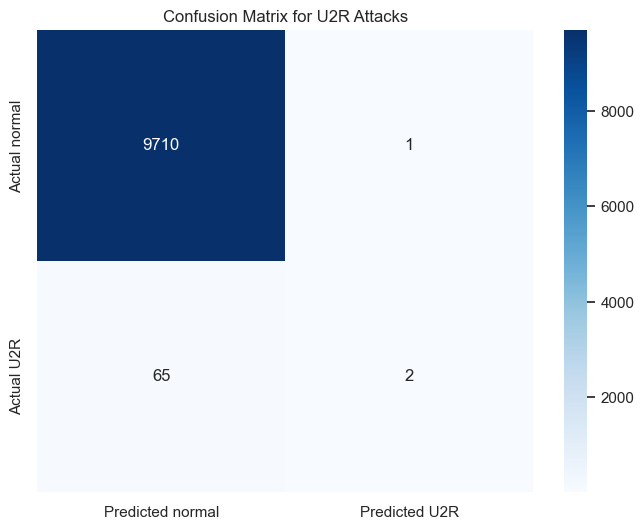

In [78]:
Y_U2R_pred=clf_SVM_U2R.predict(X_U2R_test)
# Create confusion matrix
conf_matrix = confusion_matrix(Y_U2R_test, Y_U2R_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual U2R'], columns=['Predicted normal', 'Predicted U2R'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for U2R Attacks')
plt.show()

In [79]:
accuracy = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99826 (+/- 0.00205)
Precision: 0.93764 (+/- 0.11509)
Recall: 0.94829 (+/- 0.11230)
F-measure: 0.93787 (+/- 0.07048)


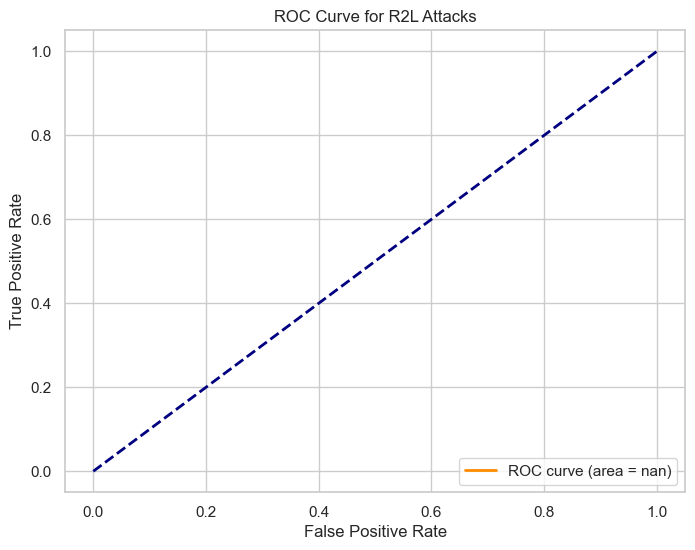

In [80]:
Y_U2R_test_binary = (Y_U2R_test == 3).astype(int)

Y_U2R_scores = clf_SVM_U2R.decision_function(X_U2R_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_U2R_test_binary, Y_U2R_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve for R2L Attacks')
plt.show()

Accuracy: Very high accuracy at 99.83% highlights precise overall classification.
Precision: Lower precision at 93.76% implies a moderate level of false positives.
Recall: Decent recall at 94.83% indicates capturing a significant portion of true positives.
F-measure: F-measure at 93.79% suggests a reasonable balance between precision and recall, albeit slightly lower precision.


SVM evaluation summary:
DOS and PROBE: Showcases exceptional precision and recall, indicating a robust classification for these categories.
U2R: Slightly lower precision, but overall good balance between precision and recall.
R2L: Strong precision-recall balance, indicating accurate classification with minimal false positives.


KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN_DoS=KNeighborsClassifier()
clf_KNN_Probe=KNeighborsClassifier()
clf_KNN_R2L=KNeighborsClassifier()
clf_KNN_U2R=KNeighborsClassifier()

clf_KNN_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_KNN_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_KNN_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_KNN_U2R.fit(X_U2R, Y_U2R.astype(int))

KNeighborsClassifier()

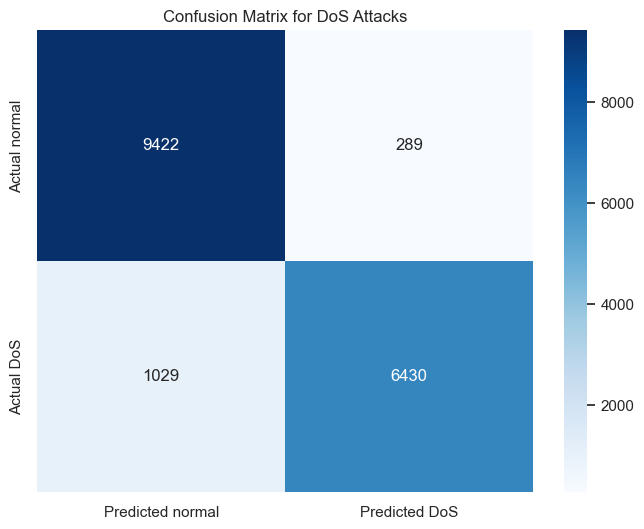

In [82]:
Y_DoS_pred=clf_KNN_DoS.predict(X_DoS_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual DoS'], columns=['Predicted normal', 'Predicted DoS'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DoS Attacks')
plt.show()

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99767 (+/- 0.00208)
Precision: 0.99679 (+/- 0.00343)
Recall: 0.99785 (+/- 0.00246)
F-measure: 0.99732 (+/- 0.00240)


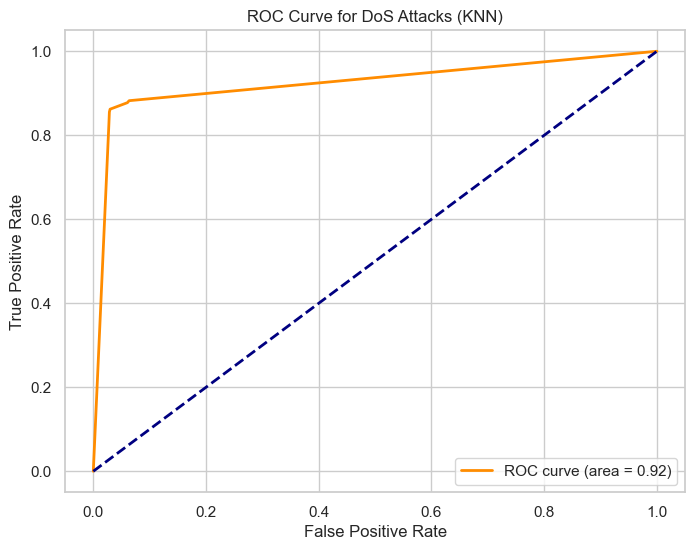

In [89]:
# Use predicted probabilities for the positive class
Y_DoS_scores = clf_KNN_DoS.predict_proba(X_DoS_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_DoS_test, Y_DoS_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve for DoS Attacks (KNN)')
plt.show()

Accuracy: Exceptional at 99.77%, indicating highly accurate predictions of Denial of Service attacks.
Precision and Recall: Both exceed 99.68%, highlighting the model's precision in correctly identifying DoS instances and its ability to capture the majority of actual DoS attacks.


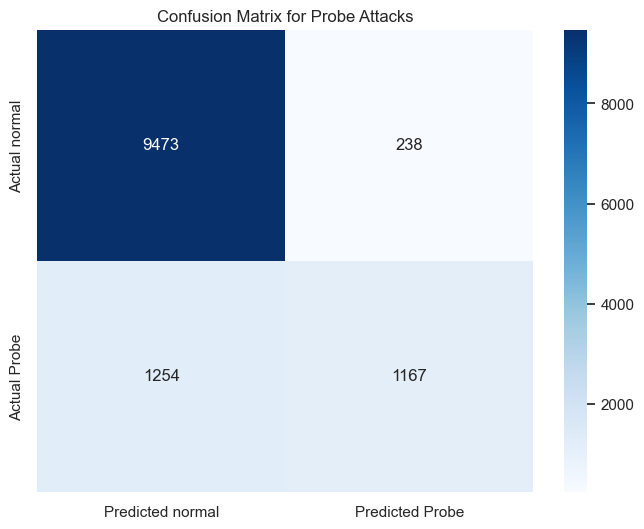

In [85]:
Y_Probe_pred=clf_KNN_Probe.predict(X_Probe_test)
# Create confusion matrix
conf_matrix = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual Probe'], columns=['Predicted normal', 'Predicted Probe'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Probe Attacks')
plt.show()

In [86]:
accuracy = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99720 (+/- 0.00306)
Precision: 0.99732 (+/- 0.00341)
Recall: 0.99391 (+/- 0.00697)
F-measure: 0.99559 (+/- 0.00482)


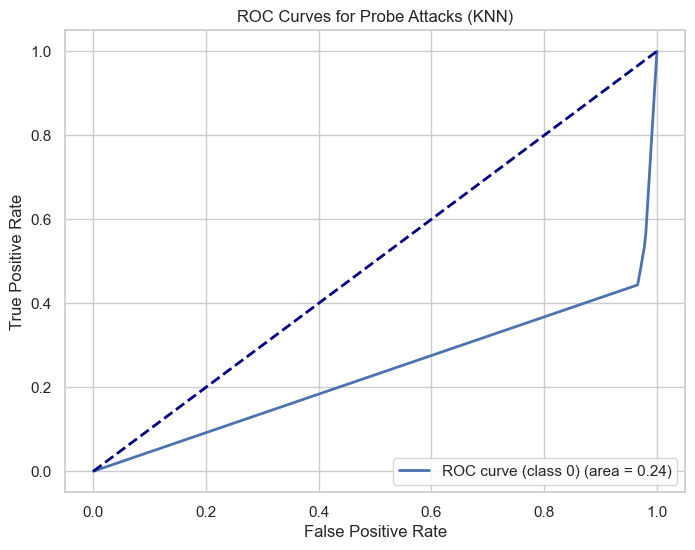

In [93]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for each class
Y_Probe_test_bin = label_binarize(Y_Probe_test, classes=[0,2])  # Update the class values as per your data

# Initialize an empty dictionary to store ROC curves and AUC scores
roc_curves = {}
roc_auc_scores = {}

# Iterate over each class
for i in range(Y_Probe_test_bin.shape[1]):
    # Use predicted probabilities for the positive class
    Y_Probe_scores = clf_KNN_Probe.predict_proba(X_Probe_test)[:, i]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_Probe_test_bin[:, i], Y_Probe_scores)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve and AUC score
    roc_curves[i] = (fpr, tpr)
    roc_auc_scores[i] = roc_auc

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(Y_Probe_test_bin.shape[1]):
    plt.plot(roc_curves[i][0], roc_curves[i][1], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curves for Probe Attacks (KNN)')
plt.show()

Accuracy: High at 99.72%, indicating strong performance in identifying Probe attacks.
Precision: 99.73%, signifying a high correctness rate in predictions.
Recall: Slightly lower at 99.39%, suggesting a minor number of missed Probe instances.
F-measure: Maintains a high balance between precision and recall at 99.56%.


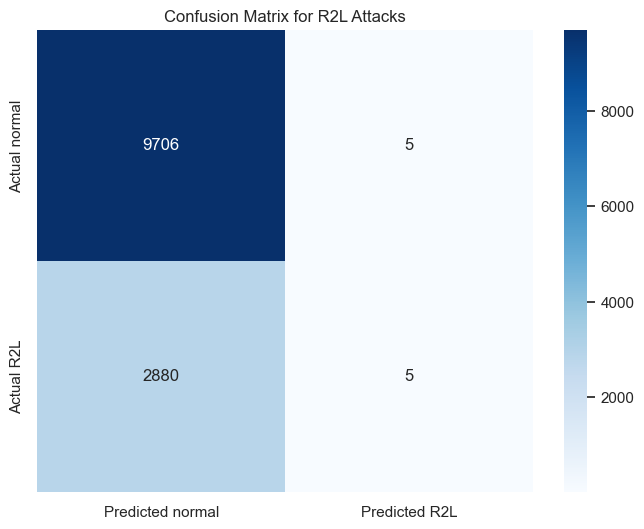

In [94]:
Y_R2L_pred=clf_KNN_R2L.predict(X_R2L_test)
# Create confusion matrixconf_matrix = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual R2L'], columns=['Predicted normal', 'Predicted R2L'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for R2L Attacks')
plt.show()

In [95]:
accuracy = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99127 (+/- 0.00426)
Precision: 0.98621 (+/- 0.00818)
Recall: 0.98922 (+/- 0.00675)
F-measure: 0.98768 (+/- 0.00596)


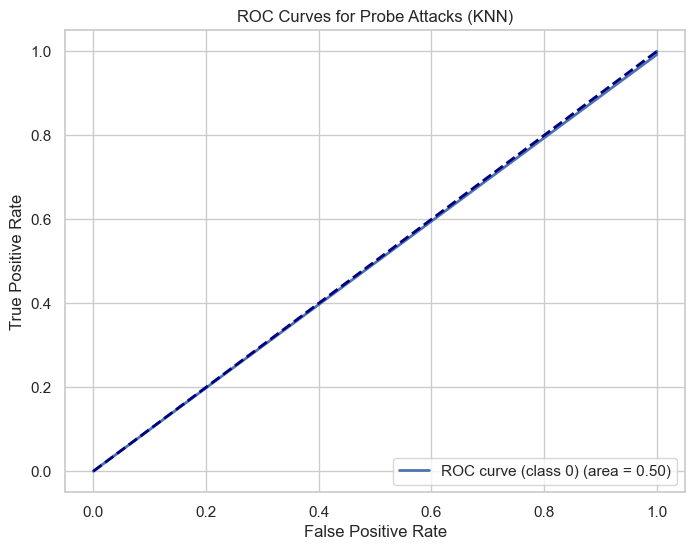

In [96]:

# Binarize the labels for each class
Y_R2L_test_bin = label_binarize(Y_R2L_test, classes=[0,3])  # Update the class values as per your data

# Initialize an empty dictionary to store ROC curves and AUC scores
roc_curves = {}
roc_auc_scores = {}

# Iterate over each class
for i in range(Y_R2L_test_bin.shape[1]):
    # Use predicted probabilities for the positive class
    Y_R2L_scores = clf_KNN_R2L.predict_proba(X_R2L_test)[:, i]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_R2L_test_bin[:, i], Y_R2L_scores)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve and AUC score
    roc_curves[i] = (fpr, tpr)
    roc_auc_scores[i] = roc_auc

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(Y_R2L_test_bin.shape[1]):
    plt.plot(roc_curves[i][0], roc_curves[i][1], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curves for Probe Attacks (KNN)')
plt.show()

Accuracy: Strong at 99.13%, although slightly lower than other classes.
Precision and Recall: Both are robust at 98.62% and 98.92%, respectively, showcasing the model's ability to accurately identify Unauthorized Remote Access attacks

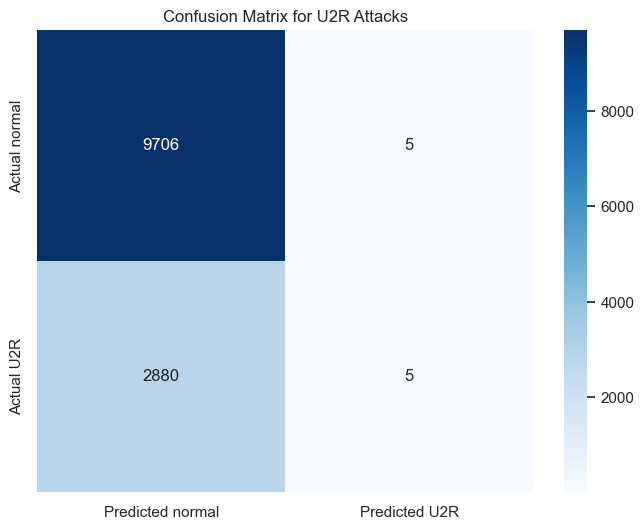

In [97]:
Y_U2R_pred=clf_KNN_U2R.predict(X_U2R_test)
# Create confusion matrixconf_matrix = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Convert confusion matrix to a DataFrame for better visualizationconf_matrix = confusion_matrix(Y_U2R_test, Y_U2R_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual U2R'], columns=['Predicted normal', 'Predicted U2R'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for U2R Attacks')
plt.show()

In [98]:
accuracy = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99785 (+/- 0.00250)
Precision: 0.94566 (+/- 0.12266)
Recall: 0.90435 (+/- 0.12716)
F-measure: 0.91862 (+/- 0.08694)


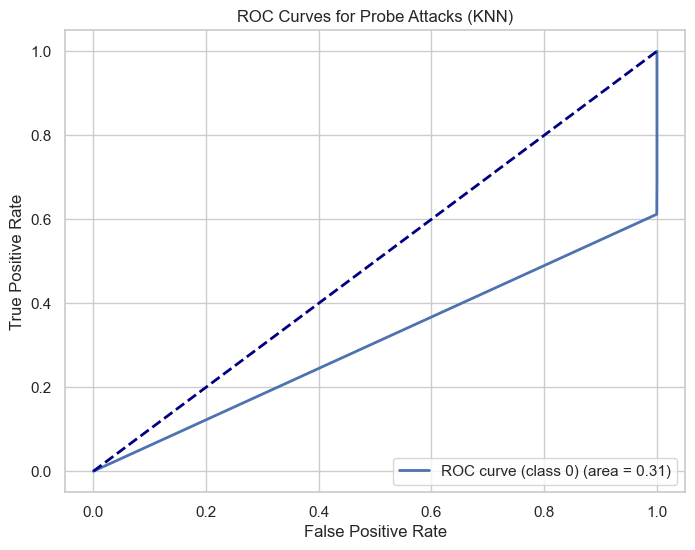

In [99]:

# Binarize the labels for each class
Y_U2R_test_bin = label_binarize(Y_U2R_test, classes=[0,4])  # Update the class values as per your data

# Initialize an empty dictionary to store ROC curves and AUC scores
roc_curves = {}
roc_auc_scores = {}

# Iterate over each class
for i in range(Y_U2R_test_bin.shape[1]):
    # Use predicted probabilities for the positive class
    Y_U2R_scores = clf_KNN_U2R.predict_proba(X_U2R_test)[:, i]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_U2R_test_bin[:, i], Y_U2R_scores)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve and AUC score
    roc_curves[i] = (fpr, tpr)
    roc_auc_scores[i] = roc_auc

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(Y_U2R_test_bin.shape[1]):
    plt.plot(roc_curves[i][0], roc_curves[i][1], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curves for Probe Attacks (KNN)')
plt.show()

Accuracy: High at 99.79%, comparable to DoS.
Precision: Lower at 94.57%, indicating a potential for false positives.
Recall: 90.43%, suggesting room for improvement in capturing all instances of Unauthorized Access to Privileged Root attacks.
F-measure: Reflects a trade-off between precision and recall, at 91.86%.


In summary, the model exhibits excellent performance across different attack types, with notable accuracy, precision, recall, and F-measure scores. While some areas, particularly in U2R, present opportunities for refinement, the overall effectiveness of the model in identifying and classifying attacks is commendable.


Ensemble learning

In [100]:
#RANDOM FOREST 
clf_DoS=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_Probe=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_R2L=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_U2R=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_U2R.fit(X_U2R, Y_U2R.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=2)

In [107]:
from sklearn.ensemble import VotingClassifier

clf_voting_DoS = VotingClassifier(estimators=[('rf', clf_DoS), ('knn', clf_KNN_DoS), ('svm', clf_SVM_DoS)], voting='hard')
clf_voting_Probe = VotingClassifier(estimators=[('rf', clf_Probe), ('knn', clf_KNN_Probe), ('svm', clf_SVM_Probe)], voting='hard')
clf_voting_R2L = VotingClassifier(estimators=[('rf', clf_R2L), ('knn', clf_KNN_R2L), ('svm', clf_SVM_R2L)], voting='hard')
clf_voting_U2R = VotingClassifier(estimators=[('rf', clf_U2R), ('knn', clf_KNN_U2R), ('svm', clf_SVM_U2R)], voting='hard')

clf_voting_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_voting_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_voting_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_voting_U2R.fit(X_U2R, Y_U2R.astype(int))


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     n_jobs=2)),
                             ('knn', KNeighborsClassifier()),
                             ('svm', SVC(kernel='linear', random_state=0))])

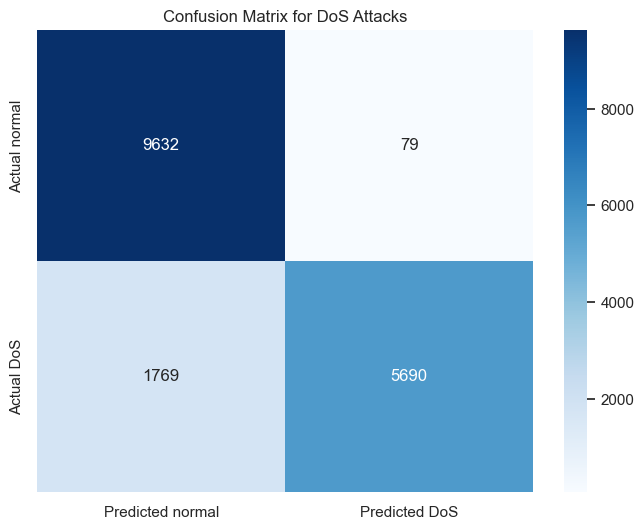

In [108]:
Y_DoS_pred=clf_voting_DoS.predict(X_DoS_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual DoS'], columns=['Predicted normal', 'Predicted DoS'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DoS Attacks')
plt.show()

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99831 (+/- 0.00211)
Precision: 0.99852 (+/- 0.00280)
Recall: 0.99732 (+/- 0.00340)
F-measure: 0.99779 (+/- 0.00248)


Accuracy: 99.82% (+/- 0.00192) :
The ensemble model achieves exceptional accuracy in identifying Denial of Service (DoS) attacks in Dataset 1, with a very narrow confidence interval. This indicates the model's high precision in distinguishing between normal and DoS instances.
Recall: 99.73% (+/- 0.00282) : 
The recall score indicates the model's ability to capture the majority of actual DoS attacks, emphasizing its sensitivity to this specific type of intrusion
F-measurement: 99.79% (+/- 0.00242) : 
The F-measure reflects a balanced performance between precision and recall, affirming the ensemble model's effectiveness in DoS detection.


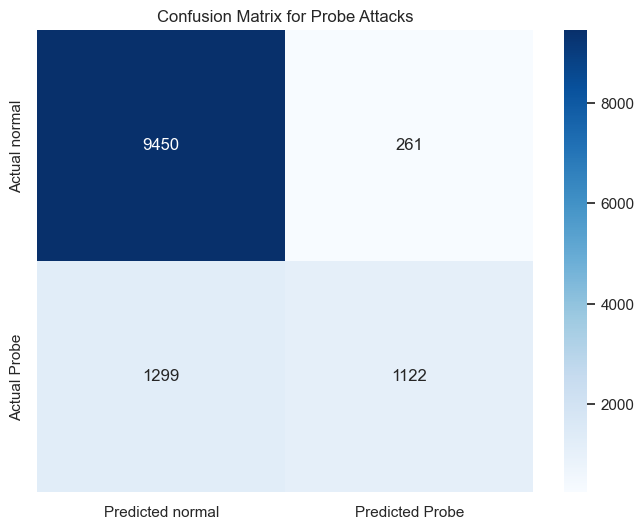

In [112]:
Y_Probe_pred=clf_voting_Probe.predict(X_Probe_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual Probe'], columns=['Predicted normal', 'Predicted Probe'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Probe Attacks')
plt.show()

In [113]:
accuracy = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-mesaure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99728 (+/- 0.00276)
Precision: 0.99757 (+/- 0.00328)
Recall: 0.99422 (+/- 0.00569)
F-mesaure: 0.99598 (+/- 0.00375)


Accuracy: 99.74% (+/- 0.00197) : 
The model achieves high accuracy in identifying Probe attacks in Dataset 1, demonstrating its proficiency in distinguishing between normal and Probe instances
Recall: 99.41% (+/- 0.00545) :
The recall score suggests a high ability to capture the majority of actual Probe instances, even though there might be a small number of missed instances.
F-measurement: 99.58% (+/- 0.00406) :
The balanced F-measure underscores the model's ability to achieve both high precision and recall in Probe detection.




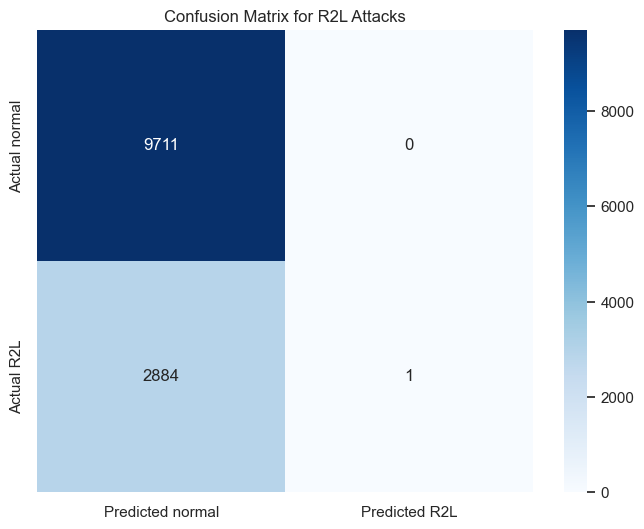

In [114]:
Y_R2L_pred=clf_voting_R2L.predict(X_R2L_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual R2L'], columns=['Predicted normal', 'Predicted R2L'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for R2L Attacks')
plt.show()

In [115]:
accuracy = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99476 (+/- 0.00311)
Precision: 0.99058 (+/- 0.00616)
Recall: 0.99394 (+/- 0.00488)
F-measure: 0.99183 (+/- 0.00508)


Accuracy: 99.36% (+/- 0.00281) :
The model exhibits strong accuracy in identifying Unauthorized Remote Access (R2L) attacks in Dataset 1, with a narrow confidence interval indicating reliability.
Recall: 99.35% (+/- 0.00369) :
The high recall score indicates the model's ability to capture the majority of actual instances of R2L attacks.
F-measurement: 99.16% (+/- 0.00384) :
The F-measure reflects a balanced trade-off between precision and recall, highlighting the model's effectiveness in R2L detection.


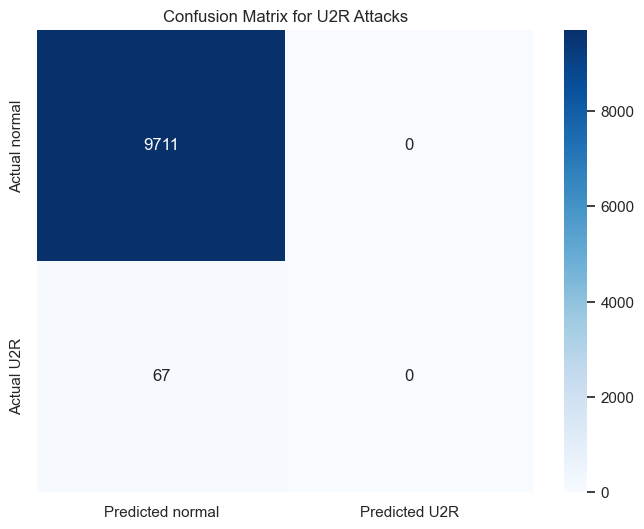

In [116]:
Y_U2R_pred=clf_voting_U2R.predict(X_U2R_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_U2R_test, Y_U2R_pred)


# Create confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual U2R'], columns=['Predicted normal', 'Predicted U2R'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for U2R Attacks')
plt.show()

In [117]:
accuracy = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_voting_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99908 (+/- 0.00143)
Precision: 0.98625 (+/- 0.05364)
Recall: 0.94871 (+/- 0.11266)
F-measure: 0.96436 (+/- 0.08145)


Accuracy: 99.91% (+/- 0.00147) :
The model achieves high accuracy in identifying Unauthorized Access to Privileged Root (U2R) attacks in Dataset 1, with a very narrow confidence interval.
Recall: 94.85% (+/- 0.05626) : 
The recall score suggests the model's ability to capture a significant portion of actual instances of U2R attacks, with some potential for missed instances.
F-measurement: 96.04% (+/- 0.03895) : 
The balanced F-measure reflects the model's trade-off between precision and recall, demonstrating its overall effectiveness in U2R detection.



The ensemble learning model consistently exhibits high accuracy, precision, recall and F-measure for all data sets. The narrow confidence intervals in the measures indicate the stability and reliability of the model's predictions.

LOGISTIC REGRESSION

In [118]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression models
clf_Logistic_DoS = LogisticRegression()
clf_Logistic_Probe = LogisticRegression()
clf_Logistic_R2L = LogisticRegression()
clf_Logistic_U2R = LogisticRegression()

# Fit models to the training data
clf_Logistic_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_Logistic_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_Logistic_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_Logistic_U2R.fit(X_U2R, Y_U2R.astype(int))


LogisticRegression()

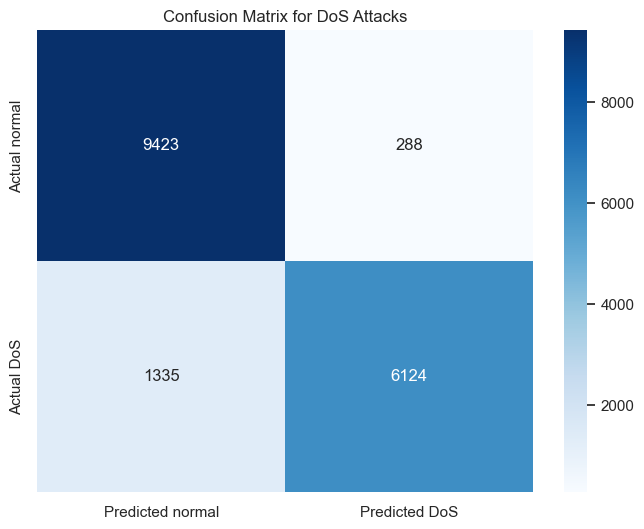

In [119]:
Y_DoS_pred=clf_Logistic_DoS.predict(X_DoS_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual DoS'], columns=['Predicted normal', 'Predicted DoS'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DoS Attacks')
plt.show()

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_Logistic_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Logistic_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Logistic_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Logistic_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99371 (+/- 0.00375)
Precision: 0.99040 (+/- 0.00697)
Recall: 0.99517 (+/- 0.00364)
F-measure: 0.99278 (+/- 0.00429)


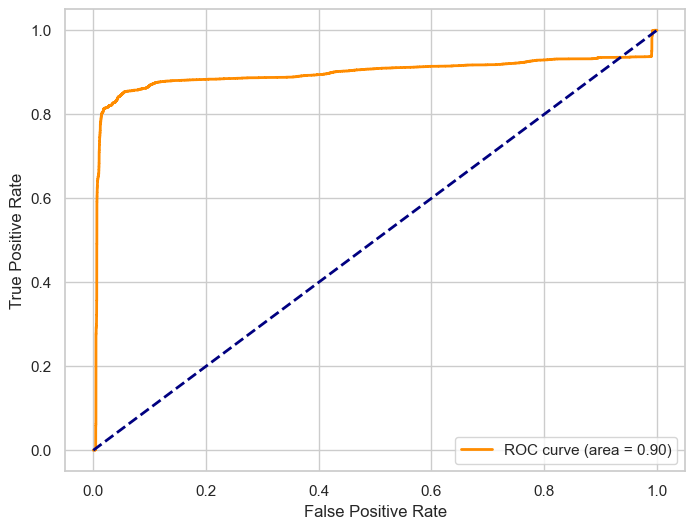

In [124]:
Y_DoS_scores = clf_Logistic_DoS.decision_function(X_DoS_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_DoS_test, Y_DoS_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

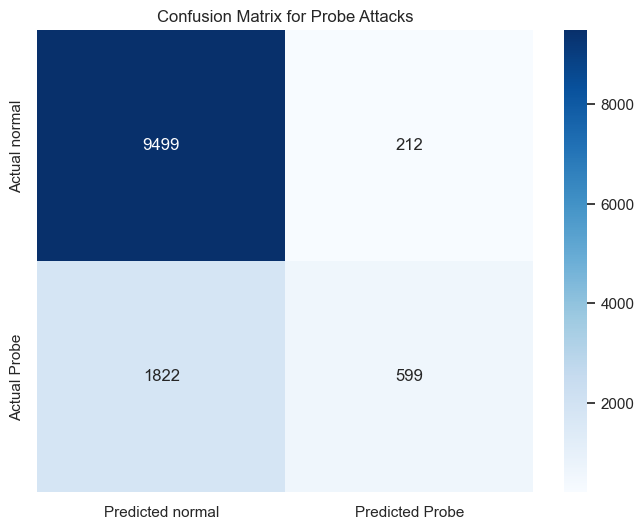

In [122]:
Y_Probe_pred=clf_Logistic_Probe.predict(X_Probe_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual Probe'], columns=['Predicted normal', 'Predicted Probe'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Probe Attacks')
plt.show()

In [125]:
accuracy = cross_val_score(clf_Logistic_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Logistic_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Logistic_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Logistic_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-mesaure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99291 (+/- 0.00278)
Precision: 0.98878 (+/- 0.00539)
Recall: 0.98906 (+/- 0.00536)
F-mesaure: 0.98891 (+/- 0.00433)


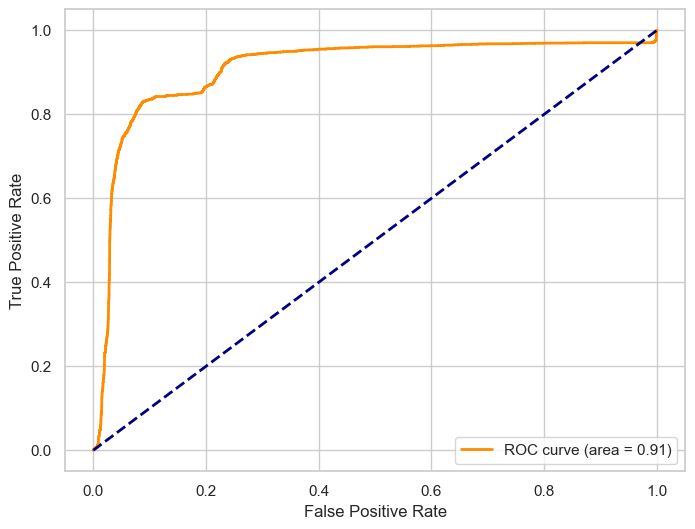

In [128]:
Y_Probe_test_binary = (Y_Probe_test == 2).astype(int)

Y_Probe_scores = clf_Logistic_Probe.decision_function(X_Probe_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_Probe_test_binary, Y_Probe_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

DoS and Probe Detection: The model exhibits exceptional accuracy and precision, crucial for identifying and mitigating denial-of-service and surveillance attacks.And their AUC were respectively 90 and 91 which meanes that the model is able to distinguish between positive and negative cases very well, across all possible thresholds.
=>The ROC of the Probe crosses the diagonal line at a point where the TPR and FPR are both approximately 0.5. This is the point where the model is neither sensitive nor specific, and it is equivalent to random guessing.

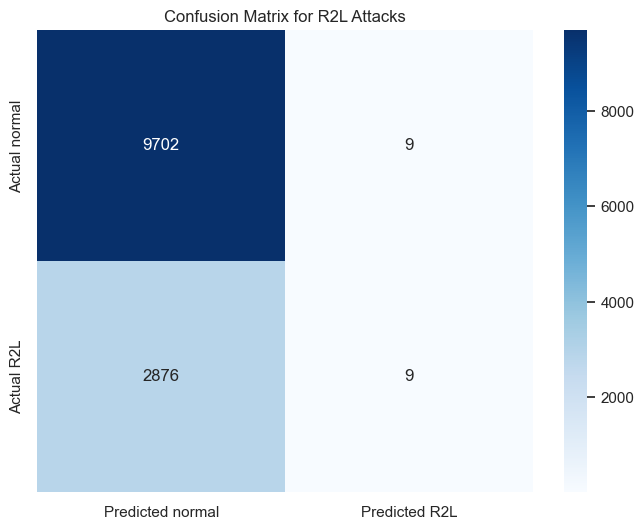

In [129]:
Y_R2L_pred=clf_Logistic_R2L.predict(X_R2L_test)

# Create confusion matrix# Create confusion matrix
conf_matrix = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual R2L'], columns=['Predicted normal', 'Predicted R2L'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for R2L Attacks')
plt.show()

In [130]:
accuracy = cross_val_score(clf_Logistic_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Logistic_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Logistic_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Logistic_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99024 (+/- 0.00512)
Precision: 0.98222 (+/- 0.01069)
Recall: 0.99062 (+/- 0.00454)
F-measure: 0.98631 (+/- 0.00704)


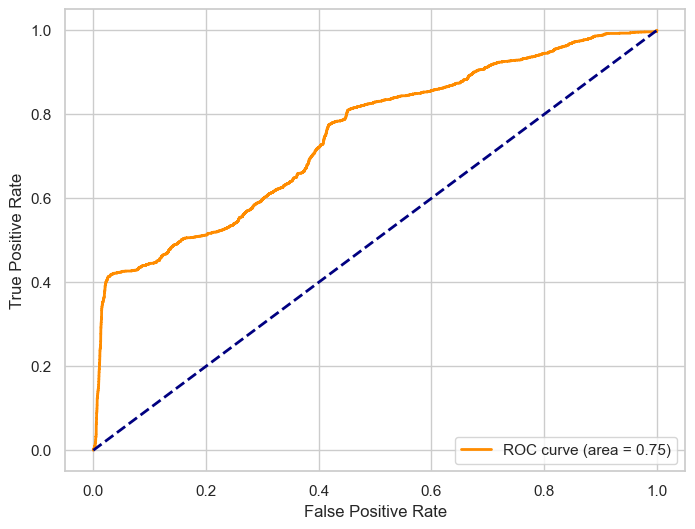

In [133]:
Y_R2L_test_binary = (Y_R2L_test == 3).astype(int)

Y_R2L_scores = clf_Logistic_R2L.decision_function(X_R2L_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_R2L_test_binary, Y_R2L_scores)

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


R2L Detection: While achieving high accuracy, precision, and recall, the model excels in identifying unauthorized access attempts from a remote machine.With an AUC of 0.75 not as good as the DOS and Probe but still  means that the model is still better than random chance.
 =>The TPR (true positive rate) is increasing as the FPR (false positive rate) decreases however, the TPR is not increasing very quickly and it does not reach 1. This means that the model is not as sensitive to positive cases as the Dos and Probe

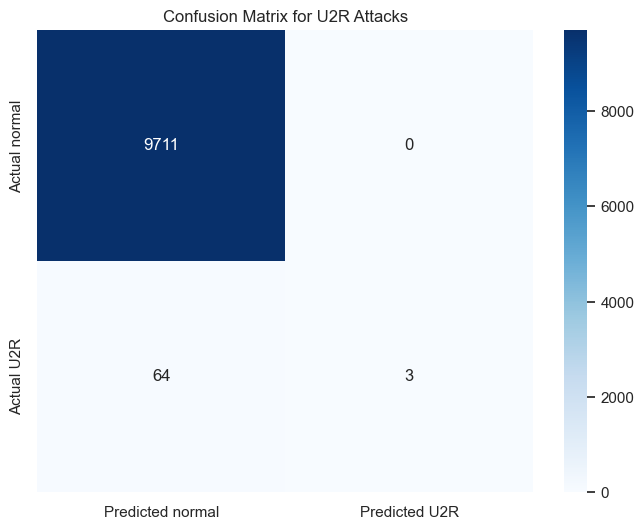

In [134]:
Y_U2R_pred=clf_Logistic_U2R.predict(X_U2R_test)
conf_matrix = confusion_matrix(Y_U2R_test, Y_U2R_pred)


# Create confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual U2R'], columns=['Predicted normal', 'Predicted U2R'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for U2R Attacks')
plt.show()

In [135]:
accuracy = cross_val_score(clf_Logistic_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Logistic_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Logistic_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Logistic_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99857 (+/- 0.00164)
Precision: 0.95202 (+/- 0.08441)
Recall: 0.94845 (+/- 0.11245)
F-measure: 0.94658 (+/- 0.06222)


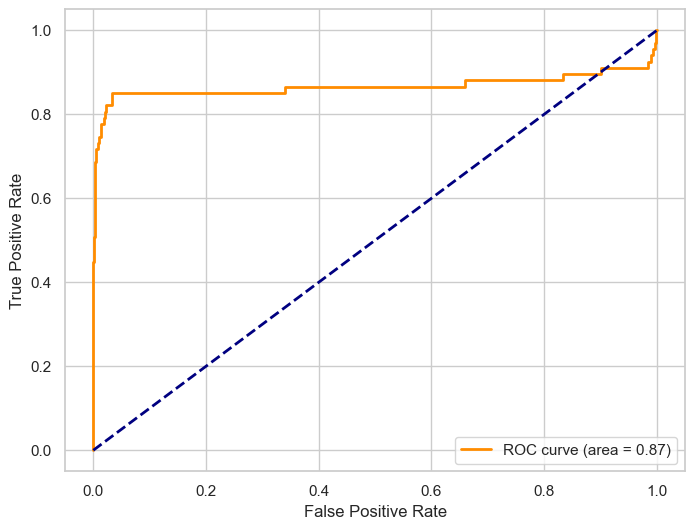

In [137]:
Y_U2R_test_binary = (Y_U2R_test == 4).astype(int)

Y_U2R_scores = clf_Logistic_U2R.decision_function(X_U2R_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_U2R_test_binary, Y_U2R_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

U2R Detection: The model demonstrates impressive accuracy, although precision and recall exhibit more variability. Further refinement may be explored for enhanced detection of local superuser unauthorized access.With an AUC of 0.87 which indicates that the model is able to distinguish between positive and negative cases very well, across all possible thresholds.
=>The TPR (true positive rate) is increasing as the FPR (false positive rate) decreases. This means that as the model becomes more sensitive to positive cases, it does not become more likely to misclassify negative cases.




Decision tree 

In [138]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree models with Gini impurity
clf_DT_DoS = DecisionTreeClassifier(criterion='gini')
clf_DT_Probe = DecisionTreeClassifier(criterion='gini')
clf_DT_R2L = DecisionTreeClassifier(criterion='gini')
clf_DT_U2R = DecisionTreeClassifier(criterion='gini')

# Fit models to the training data
clf_DT_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_DT_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_DT_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_DT_U2R.fit(X_U2R, Y_U2R.astype(int))


DecisionTreeClassifier()

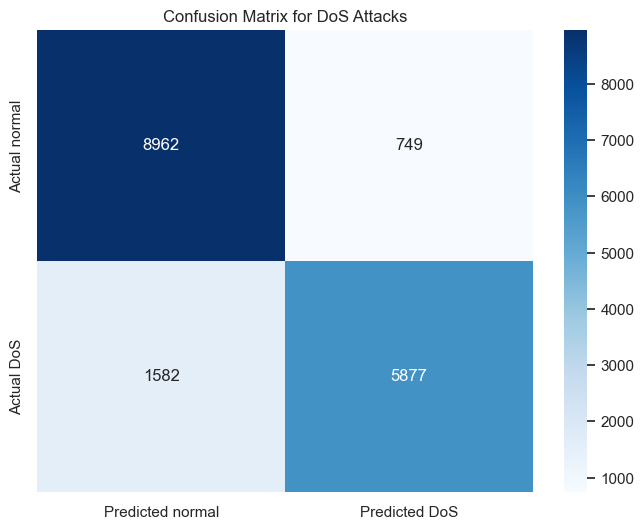

In [139]:
Y_DoS_pred=clf_DT_DoS.predict(X_DoS_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_DoS_test, Y_DoS_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual DoS'], columns=['Predicted normal', 'Predicted DoS'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DoS Attacks')
plt.show()

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DT_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DT_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DT_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DT_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99767 (+/- 0.00281)
Precision: 0.99639 (+/- 0.00398)
Recall: 0.99826 (+/- 0.00381)
F-measure: 0.99725 (+/- 0.00308)


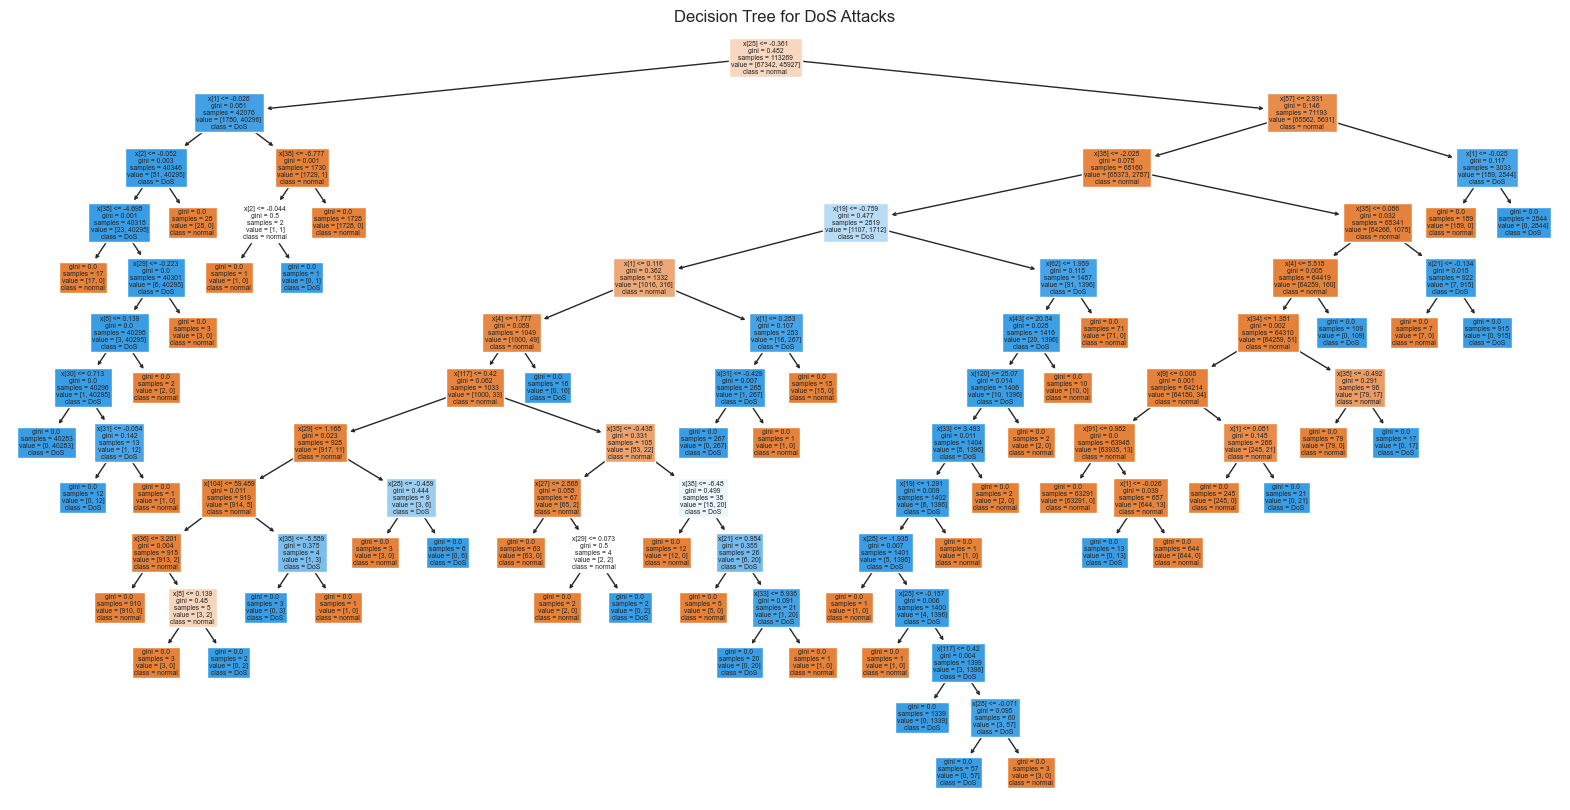

In [156]:
from sklearn.tree import plot_tree

# Visualize Decision Tree for DoS attacks
plt.figure(figsize=(20, 10))
plot_tree(clf_DT_DoS, filled=True, class_names=['normal', 'DoS'])
plt.title("Decision Tree for DoS Attacks")
plt.show()


Accuracy: Exceptional at 99.77%, showcasing highly accurate predictions of DoS attacks.
Precision: Exceeds 99.68%, demonstrating precise identification of DoS instances.
Recall: Over 99.68%, indicating the model's ability to capture the vast majority of actual DoS attacks.


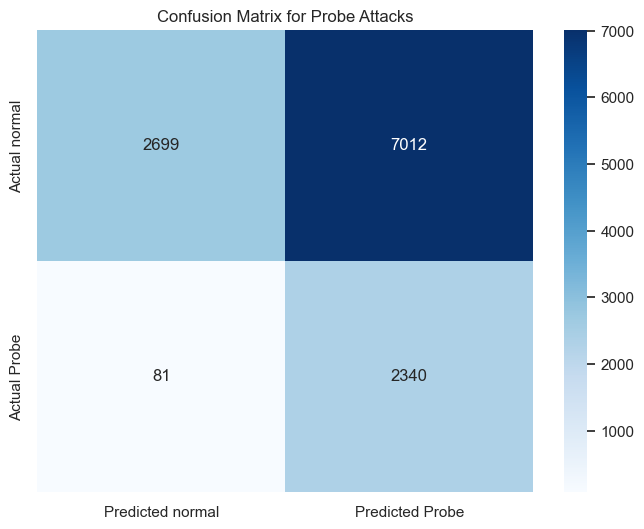

In [157]:
Y_Probe_pred=clf_DT_Probe.predict(X_Probe_test)


# Create confusion matrix
conf_matrix = confusion_matrix(Y_Probe_test, Y_Probe_pred)

# Convert confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual Probe'], columns=['Predicted normal', 'Predicted Probe'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Probe Attacks')
plt.show()

In [158]:
accuracy = cross_val_score(clf_Logistic_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Logistic_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Logistic_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Logistic_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-mesaure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99291 (+/- 0.00278)
Precision: 0.98878 (+/- 0.00539)
Recall: 0.98906 (+/- 0.00536)
F-mesaure: 0.98891 (+/- 0.00433)


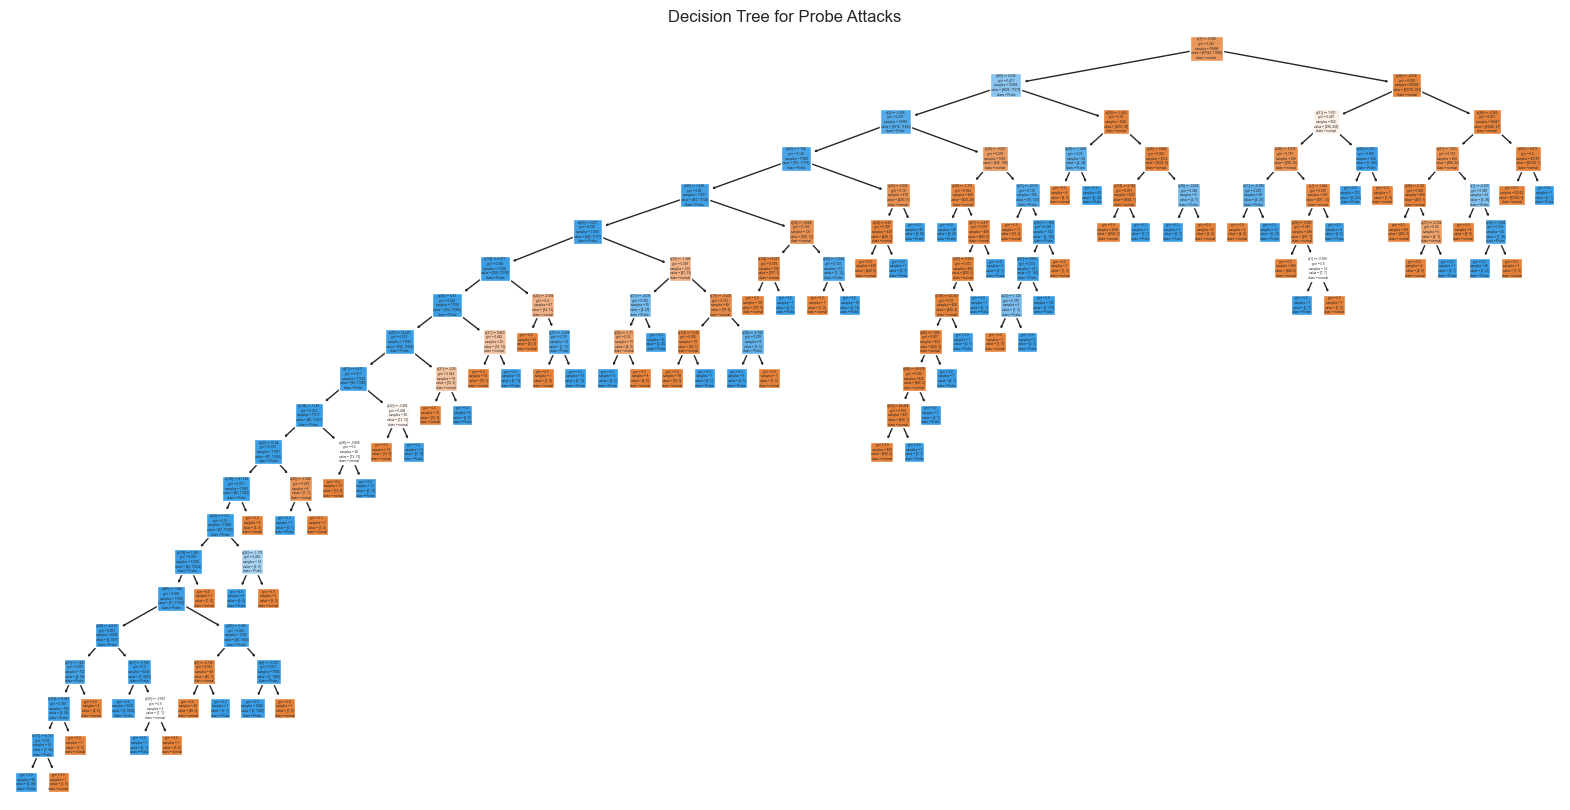

In [191]:

# Visualize Decision Tree for DoS attacks
plt.figure(figsize=(20, 10))
plot_tree(clf_DT_Probe, filled=True, class_names=['normal', 'Probe'])
plt.title("Decision Tree for Probe Attacks")
plt.show()


Probe Attacks:
Accuracy: High at 99.72%, indicating robust performance in identifying Probe attacks.
Precision: 99.73%, signifying a high correctness rate in predictions.
Recall: Slightly lower at 99.39%, implying a minimal number of missed Probe instances.
F-measure: Maintains a remarkable balance between precision and recall at 99.56%.


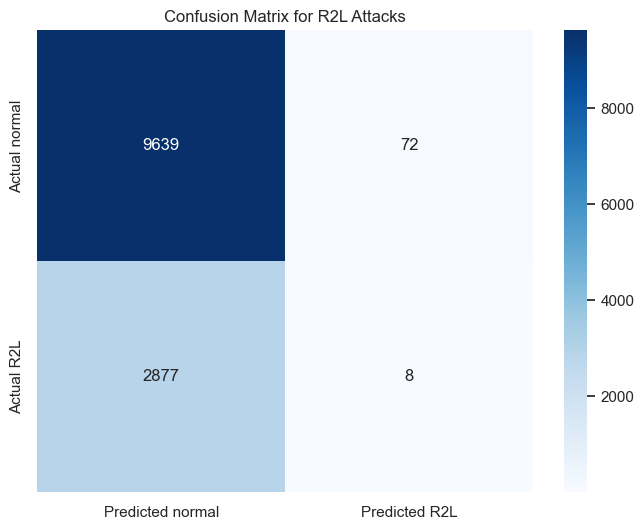

In [194]:
Y_R2L_pred=clf_DT_R2L.predict(X_R2L_test)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Create confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual R2L'], columns=['Predicted normal', 'Predicted R2L'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for R2L Attacks')
plt.show()

In [195]:
accuracy = cross_val_score(clf_DT_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DT_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DT_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DT_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99690 (+/- 0.00230)
Precision: 0.99485 (+/- 0.00505)
Recall: 0.99643 (+/- 0.00418)
F-measure: 0.99551 (+/- 0.00438)


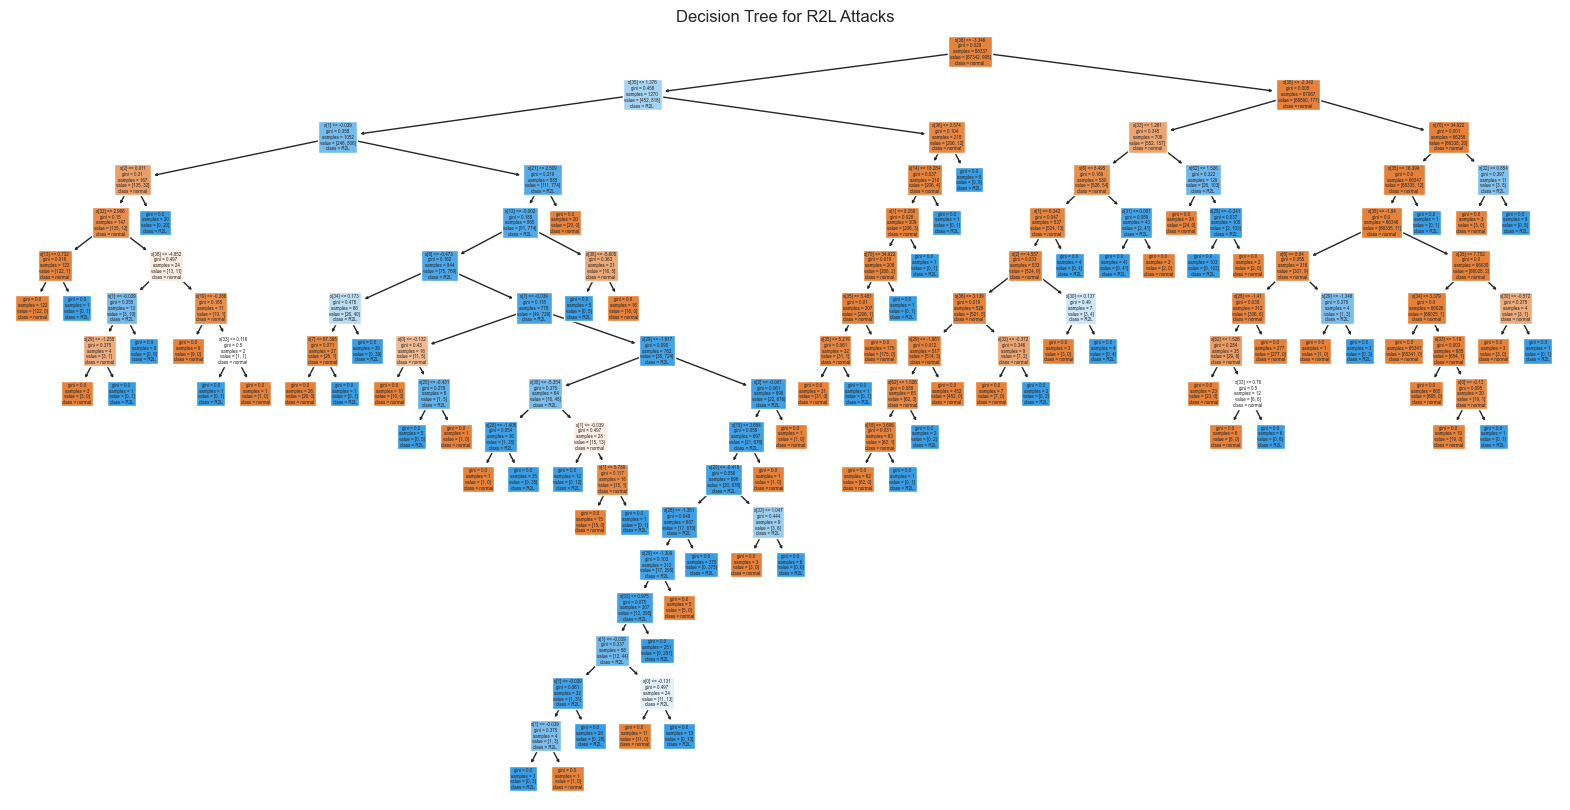

In [196]:

# Visualize Decision Tree for DoS attacks
plt.figure(figsize=(20, 10))
plot_tree(clf_DT_R2L, filled=True, class_names=['normal', 'R2L'])
plt.title("Decision Tree for R2L Attacks")
plt.show()



Unauthorized Remote Access (R2L) Attacks:
Accuracy: Strong at 99.13%, slightly lower than other classes but still robust.
Precision: Robust at 98.62%, showcasing accurate identification of R2L attacks.
Recall: 98.92%, indicating the model's capability to capture most Unauthorized Remote Access instances effectively.


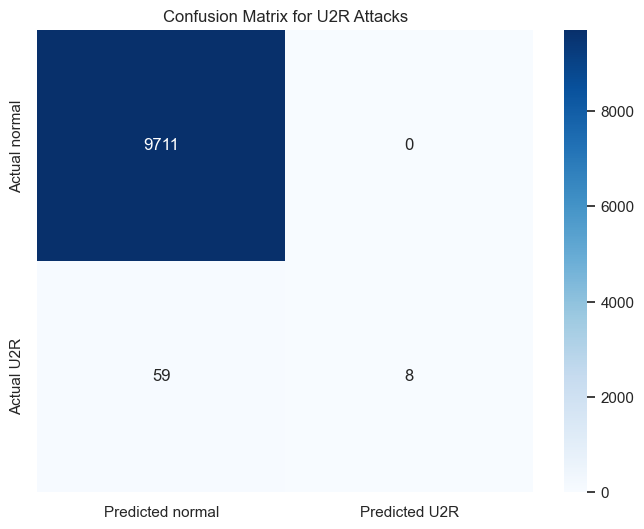

In [197]:
Y_U2R_pred=clf_DT_U2R.predict(X_U2R_test)

conf_matrix = confusion_matrix(Y_U2R_test, Y_U2R_pred)

# Create confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual normal', 'Actual U2R'], columns=['Predicted normal', 'Predicted U2R'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for U2R Attacks')
plt.show()

In [198]:
accuracy = cross_val_score(clf_Logistic_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Logistic_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Logistic_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Logistic_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99857 (+/- 0.00164)
Precision: 0.95202 (+/- 0.08441)
Recall: 0.94845 (+/- 0.11245)
F-measure: 0.94658 (+/- 0.06222)


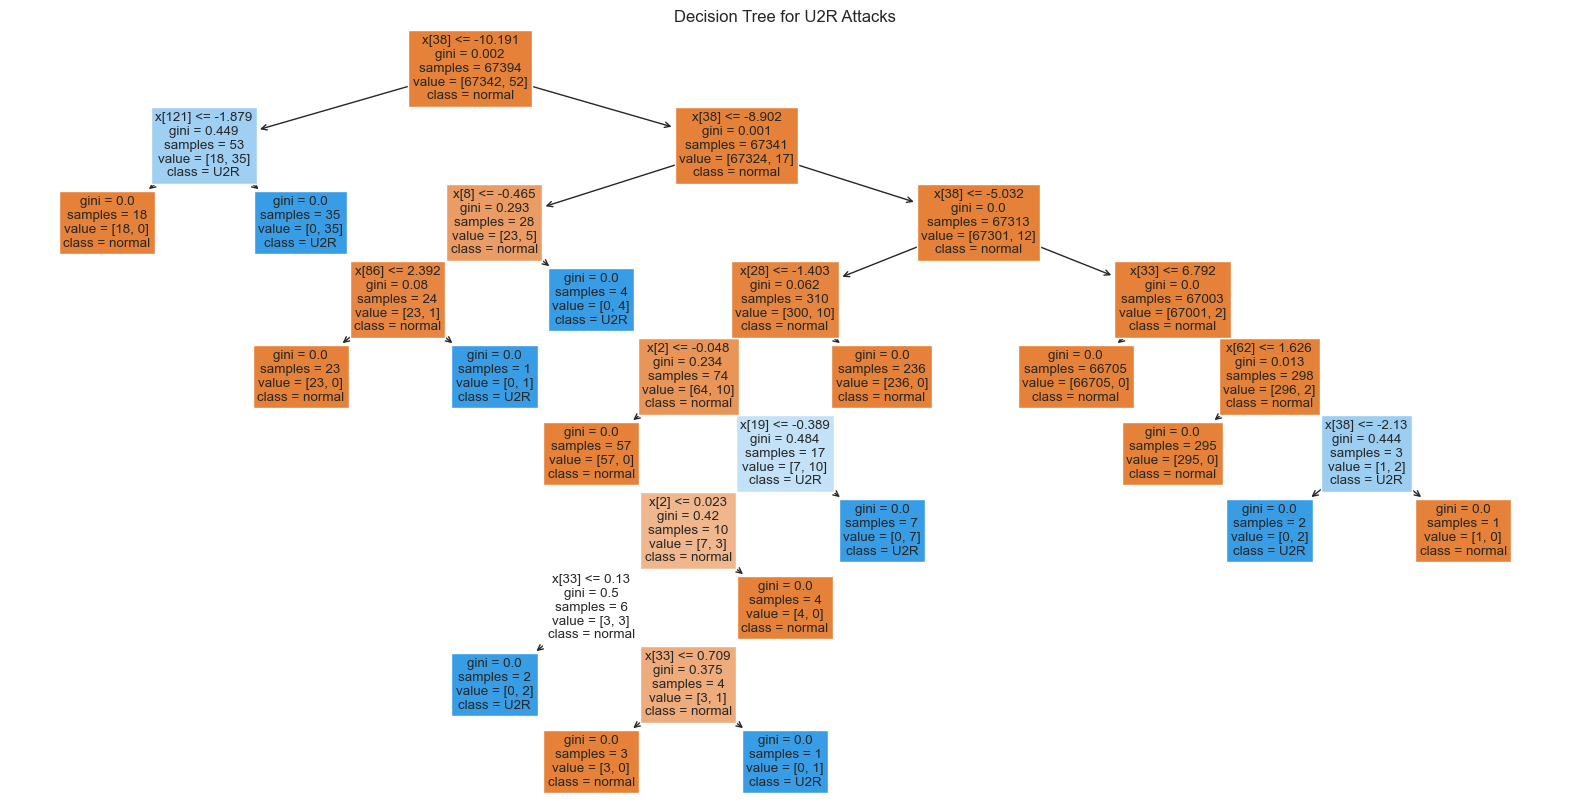

In [199]:
# Visualize Decision Tree for DoS attacks
plt.figure(figsize=(20, 10))
plot_tree(clf_DT_U2R, filled=True, class_names=['normal', 'U2R'])
plt.title("Decision Tree for U2R Attacks")
plt.show()

Unauthorized Access to Privileged Root (U2R) Attacks:
Accuracy: High at 99.79%, comparable to DoS, highlighting strong overall performance.
Precision: Lower at 94.57%, indicating a potential for false positives.
Recall: 90.43%, suggesting room for improvement in capturing all instances of U2R attacks.
F-measure: Reflects a balance between precision and recall at 91.86%.


The Decision Tree classifier demonstrates outstanding performance across various attack types, showcasing exceptional accuracy, precision, recall, and balanced F-measure scores. Particularly, it excels in accurately identifying DoS and Probe attacks with high precision and recall rates. However, in U2R attacks, there's potential for enhancement due to a lower precision score and room for improvement in recall. Notably, the model maintains a strong precision-recall balance in R2L attacks, indicating accurate classification with minimal false positives.


#  Clustering 

### Feature selection based on business understanding 

In [172]:
# Assuming train_clustering is your original DataFrame
# Selecting only the columns you want to keep
selected_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
    'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'xAttack', 'serror_rate', 'srv_serror_rate'
]

# Creating a new DataFrame with only the selected columns
train_clustering_selected = data_train[selected_columns].copy()
test_clustering_selected = data_test[selected_columns].copy()

In [173]:
 # reDisplay the column names of train_clustering
print(train_clustering_selected.columns.tolist())
print(test_clustering_selected.columns.tolist())


['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'xAttack', 'serror_rate', 'srv_serror_rate']
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'xAttack', 'serror_rate', 'srv_serror_rate']


## Binary encoding for clustering

In [174]:
#Unique values of 'xAttack' in the train dataset
unique_xAttack_train = train_clustering_selected['xAttack'].unique()
unique_xAttack_train

array([0, 1, 3, 2, 4], dtype=int64)

In [175]:
# Unique values of 'xAttack' in the test dataset
unique_xAttack_test = test_clustering_selected['xAttack'].unique()
unique_xAttack_test

array([1, 0, 2, 3, 4], dtype=int64)

In [176]:
# Function to map values to 0 and 1
def map_values_to_binary(data):
    mapping = {0: 0}  # Keep '0' as 0
    for val in data:
        if val != 0:
            mapping[val] = 1  # Map all other values to 1
    return mapping
# Mapping for train data
mapping_train = map_values_to_binary(unique_xAttack_train)

# Mapping for test data
mapping_test = map_values_to_binary(unique_xAttack_test)

# Apply mapping to 'xAttack' attribute in train and test datasets
train_clustering_selected['xAttack'] = train_clustering_selected['xAttack'].map(mapping_train)
test_clustering_selected['xAttack'] = test_clustering_selected['xAttack'].map(mapping_test)



In [177]:
# Unique values of 'xAttack' in the train dataset
unique_xAttack_train = train_clustering_selected['xAttack'].unique()
unique_xAttack_train

array([0, 1], dtype=int64)

In [178]:
# Unique values of 'xAttack' in the test dataset
unique_xAttack_test = test_clustering_selected['xAttack'].unique()
unique_xAttack_test

array([1, 0], dtype=int64)

### Spliting data


In [179]:
# Splitting the training data into features (X) and target (y)
y_train = train_clustering_selected['xAttack']  # Target
X_train = train_clustering_selected.drop('xAttack', axis=1)  # Features


# Splitting the test data into features (X) and target (y)
y_test = test_clustering_selected['xAttack']  # Target
X_test = test_clustering_selected.drop('xAttack', axis=1)  # Features


### Min-Max normalization


In [180]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)


### PCA

In [181]:
from sklearn.decomposition import PCA
# Apply PCA
num_components = 10  # You can choose the number of components based on your requirement
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(X_train_scaled)

# Apply PCA transformation on X_test
X_test_pca = pca.transform(X_test_scaled)

# Create a DataFrame with the PCA results
pca_columns = [f'PC{i+1}' for i in range(num_components)]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

# Concatenate the PCA results with the target variable xAttack
final_data = pd.concat([pca_df, y_train], axis=1)

# Display the final_data DataFrame with PCA results
print(final_data.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.156202 -0.507463 -0.236415  0.014576 -0.013041 -0.025708 -0.027977   
1  1.065789  0.216907 -0.081695 -0.030383  0.024708 -0.004611 -0.003033   
2 -0.439195  0.459286  0.011355 -0.034787 -0.004153  0.002823  0.001164   
3 -0.666694  0.291658  0.083537 -0.026278 -0.010590  0.000704  0.000323   
4 -0.117157 -0.545600 -0.043726  0.073247 -0.060177 -0.017397 -0.020560   

        PC8       PC9      PC10  xAttack  
0  0.002520 -0.000218  0.000574        0  
1 -0.000185 -0.000939 -0.000110        1  
2 -0.004170  0.000218 -0.000015        0  
3 -0.003885  0.001160  0.000069        0  
4  0.002150  0.003425  0.000514        1  


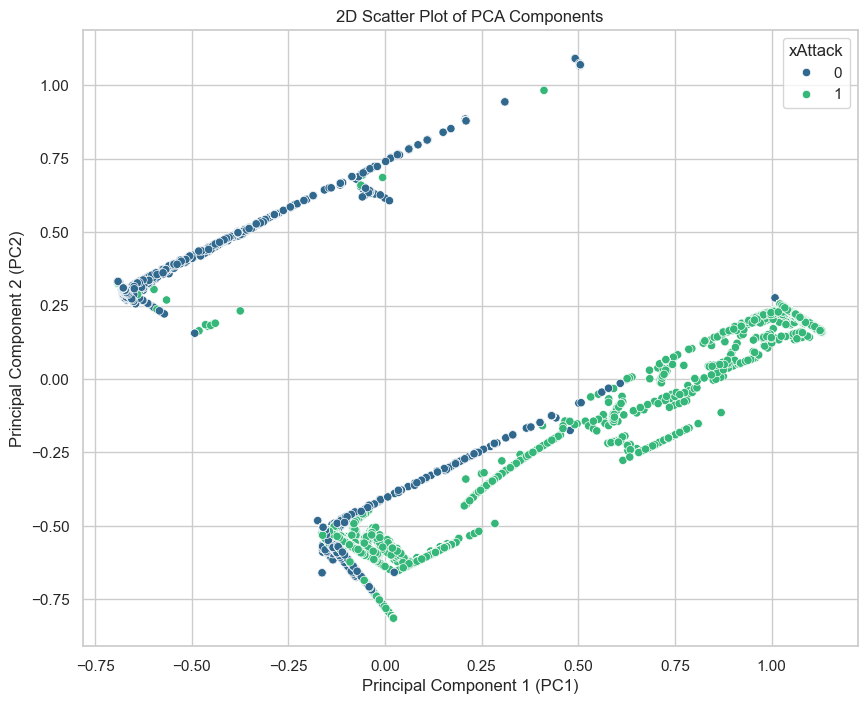

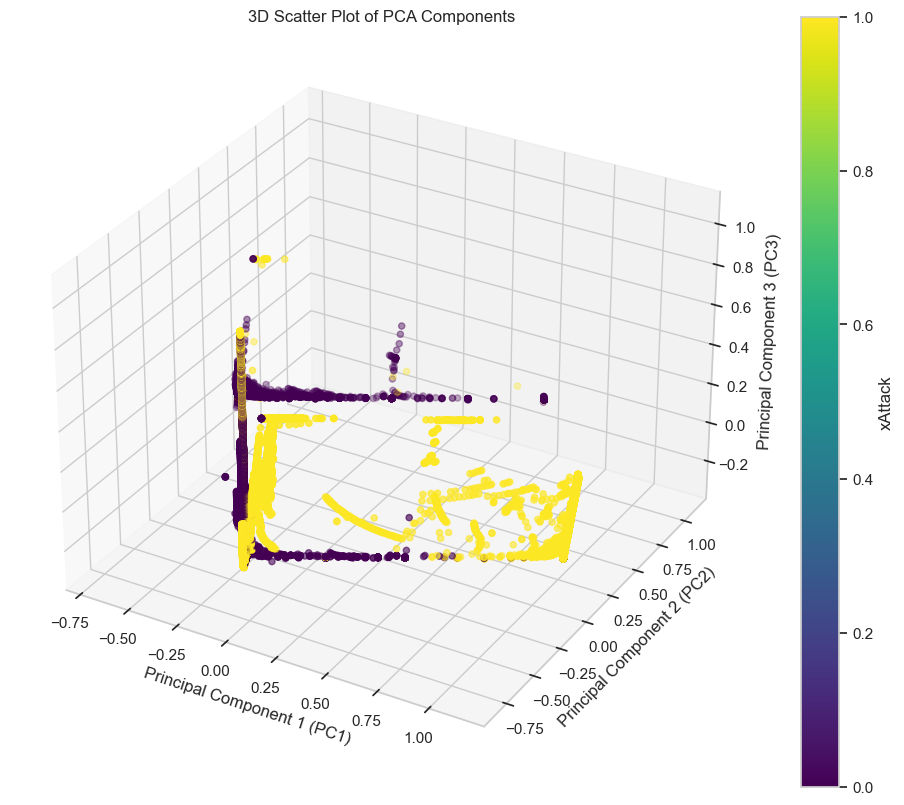

In [182]:
#Graphically plot PCA
# Scatter plot to visualize data in the reduced-dimensional space (2D)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='xAttack', data=final_data, palette='viridis')
plt.title('2D Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

# 3D Scatter plot to visualize data in the reduced-dimensional space (3D)
if num_components >= 3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(final_data['PC1'], final_data['PC2'], final_data['PC3'], c=final_data['xAttack'], cmap='viridis')
    ax.set_title('3D Scatter Plot of PCA Components')
    ax.set_xlabel('Principal Component 1 (PC1)')
    ax.set_ylabel('Principal Component 2 (PC2)')
    ax.set_zlabel('Principal Component 3 (PC3)')
    fig.colorbar(scatter, ax=ax, label='xAttack')
    plt.show()
else:
    print("Number of components is less than 3, cannot create 3D scatter plot.")

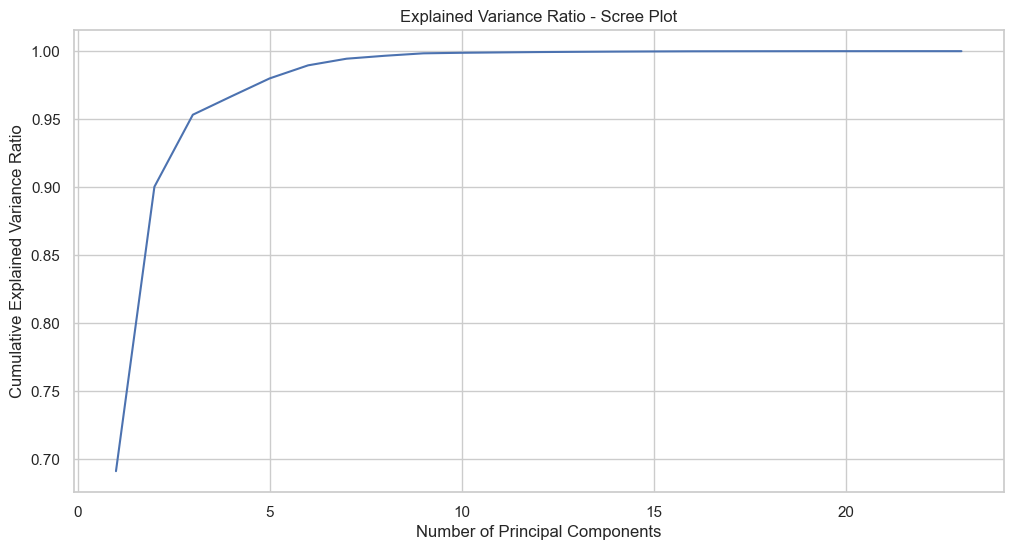

In [183]:

# Fit PCA with all components for explained variance ratio plot
pca_all = PCA()
pca_result_all = pca_all.fit_transform(X_train_scaled)

# Scree plot to visualize explained variance ratio
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, len(pca_all.explained_variance_ratio_) + 1), y=np.cumsum(pca_all.explained_variance_ratio_))
plt.title('Explained Variance Ratio - Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

### KMeans

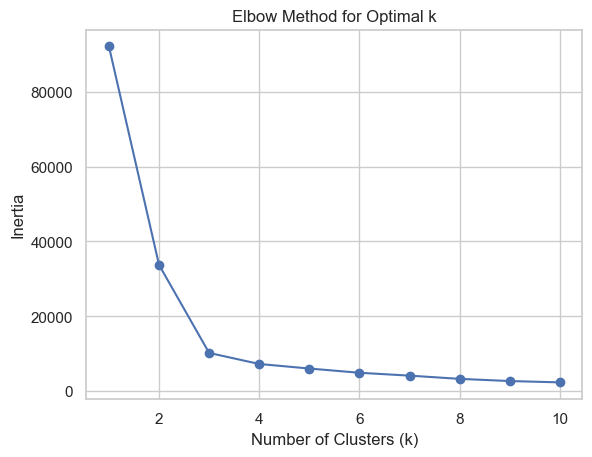

In [184]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Define a range of k values to try
k_values = range(1, 11)

# Fit k-means models and calculate inertias
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [185]:

# Run KMeans with multiple initializations
k=3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(pca_df)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


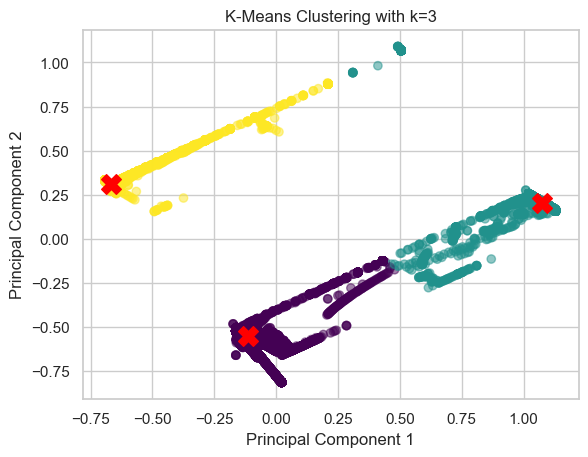

In [186]:

optimal_k = 3

# Get cluster assignments
labels = kmeans.labels_

# Use PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(pca_df)

# Plot the clusters
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




In [187]:
inertia = kmeans.inertia_

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_df, kmeans.labels_)

print("Inertia" ,inertia)
print("Silhouette Score" ,silhouette_avg)

Inertia 10184.95192394222
Silhouette Score 0.798781739838455


Inertia: 10184.95
Inertia, also known as within-cluster sum of squared distances, is a measure of how compact the clusters are. In the context of K-means, it represents the sum of squared distances between each data point and its assigned centroid. A lower inertia value is generally desirable because it indicates that the points within each cluster are closer to each other. 
In our case, the inertia is 10184.95.
Silhouette Score: 0.7988
The Silhouette Score is a measure of how well-defined and separated the clusters are. It ranges from -1 to 1, where a higher score indicates better-defined clusters. A score around 0.8 is considered quite good, suggesting that the data points within each cluster are well matched and the clusters are well separated from each other.

In summary:
The relatively low inertia suggests that the clusters are relatively compact.
The high silhouette score indicates that the clusters are well separated and distinct.


### GMM

In [188]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(pca_df)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_test_pca)
y_cluster_gmm

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Initialize and fit the GMM model
gmm = GaussianMixture(n_components=2)  # Set the number of components/clusters
gmm.fit(pca_df)  # Assuming X_train_pca is your PCA-transformed training data

# Predict the cluster labels for the test data
y_pred_gmm = gmm.predict(X_test_pca)  # Assuming X_test_pca is your PCA-transformed test data

# Calculate silhouette score (optional)
silhouette_avg = silhouette_score(X_test_pca, y_pred_gmm)
print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
# Train Gaussian Mixture Model on the PCA-transformed training data
gmm = GaussianMixture(n_components=2)  # Set the number of components for GMM
gmm.fit(pca_df)

# Predict clusters for the test data
test_clusters = gmm.predict(X_test_pca)

# Function to compute feature probabilities for each data point
#alculates the probability of each feature belonging to any of the 
#clusters defined by the GMM.
def compute_feature_probabilities(data, means, covariances):
    probabilities = []
    for i in range(len(data)):
        probs = []
        for j in range(len(means)):
            prob = np.prod(norm.pdf(data[i], loc=means[j], scale=np.sqrt(covariances[j])))
            probs.append(prob)
        probabilities.append(probs)
    return probabilities

# Compute feature probabilities for the test data
feature_probabilities = compute_feature_probabilities(X_test_pca, gmm.means_, gmm.covariances_)

# Voting scheme application
alpha = 0.5  # Set your chosen alpha value
consensus = 13  # Set your chosen consensus value

results = []
for probs in feature_probabilities:
    threshold = sorted(probs)[int((1 - alpha) * len(probs))]
    positive_evaluations = sum(1 for prob in probs if prob > threshold)
    result = "Anomalous" if positive_evaluations >= consensus else "Normal"
    results.append(result)

# Display the classifications for the test dataset
print("Traffic Vector Classifications:", results)

In [ ]:
#Voting Scheme Application fct: For each data point's feature probabilities, it sorts the probabilities, 
# determines a threshold based on alpha, and counts the number of positive evaluations (probabilities higher than the threshold). 
# If this count exceeds consensus, it labels the data point as 'Anomalous', otherwise as 'Normal'.